# Cyber Security Attacks

## Fuente del Dataset

El Dataset se obtuvo de: https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks

Descripción de la fuente del Dataset:

Aquí está la traducción al español, considerando que es información de ciberseguridad:
¡El conjunto de datos cibernéticos sintéticos de Incribo! Elaborado con precisión, este conjunto de datos ofrece una representación realista del historial de actividad en línea, convirtiéndolo en un entorno ideal para diversas tareas analíticas.

¡Utilice el conjunto de datos de ataques de ciberseguridad para ayudarlo a evaluar los mapas de calor, las firmas de ataque, los tipos y más!



## 1. Introducción

El conjunto de datos que abordaremos en este proyecto proviene de registros de tráfico de red y actividades relacionadas con la seguridad cibernética. Este estudio se centra en la identificación y predicción de tipos de ataques cibernéticos en una red, utilizando un enfoque basado en datos. El dataset contiene múltiples atributos que describen características de los paquetes de datos y eventos de red, como el protocolo utilizado, la longitud del paquete, el tipo de tráfico, indicadores de malware, entre otros.

A continuación se muestran las columnas del Dataset:

 1. **Timestamp**

 2. **Source IP Address**

 3. **Destination IP Address**

 4. **Source Port**

 5. **Destination Port**

 6. **Protocol**

 7. **Packet Length**

 8. **Packet Type**

 9. **Traffic Type**

 10. **Payload Data**

 11. **Malware Indicators**

 12. **Anomaly Scores**

 13. **Alerts/Warnings**

 14. **Attack Type**

 15. **Attack Signature**

 16. **Action Taken**

 17. **Severity Level**

 18. **User Information**

 19. **Device Information**

 20. **Network Segment**

 21. **Geo-location Data**

 22. **Proxy Information**

 23. **Firewall Logs**

 24. **IDS/IPS Alerts**

 25. **Log Source**

## 2. Objetivo del Proyecto

Desarrollar un modelo predictivo que pueda determinar el tipo de ataque cibernético basado en las características del tráfico de red e indicadores de seguridad, utilizando técnicas de clasificación, buscamos identificar patrones y relaciones entre las variables del conjunto de datos que permitan prever el tipo de ataque con alta precisión.

## 3. Hipótesis

- **3.1. Relación entre la Información de Red y Tipos de Ataques:**

Se espera que la información de red (Timestamp, Source IP Address, Destination IP Address, Source Port, Destination Port, Protocol, Packet Length, Packet Type y Traffic Type) tengan una correlación significativa con tipos específicos de ataques cibernéticos.

- **3.2. Impacto de los Datos de Seguridad y Detección:**

La presencia de Datos de Seguridad y Detección (Malware Indicators, Anomaly Scores, Alerts/Warnings, Attack Signature, Severity Level y Action Taken) se correlacionará fuertemente con ciertos tipos de ataques, como malware y ransomware.

- **3.3. Influencia del Usuario y su Dispositivo:**

La información de usuario y su dispostivo (User Information y Device Information) puede tener relación directa con el tipo de ataque.

- **3.4. Correlación entre la Información de Red y Localización,  y los tipos de Ataques:**

Se espera que la información de la red y la localización (Network Segment y Geo-location Data) más con unos tipos de ataque que con otros.

- **3.5. Variación según los indicadores y los tipos de ataque:**

Hay algunos indicadores que van a estar presentes en unos tipos de ataque que en otros.

## 4. Contexto Comercial

El análisis de este conjunto de datos tiene una relevancia significativa en el ámbito de la ciberseguridad, ya que puede proporcionar información valiosa para mejorar las estrategias de defensa y mitigación de ataques cibernéticos. Al comprender los factores que influyen en la ocurrencia de diferentes tipos de ataques, las organizaciones pueden adaptar y optimizar sus medidas de seguridad, ahorrando recursos y aumentando la efectividad de sus defensas. La capacidad de prever el tipo de ataque también puede tener un impacto positivo en la respuesta a incidentes y en la protección de infraestructuras críticas.

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import mnlogit

In [193]:
# Cargar los datos
url_dataset = "https://raw.githubusercontent.com/incribo-inc/cybersecurity_attacks/main/cybersecurity_attacks.csv"

df = pd.read_csv(url_dataset, sep = ',')

# ver la información del df
display(df.sample(5))

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
25116,2020-10-19 06:14:27,2.241.154.213,201.7.94.130,7178,25628,ICMP,154,Data,HTTP,Cum ipsum provident. Temporibus optio delectus...,...,Logged,Low,Nehmat Wali,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Arrah, Tripura",NaN,Log Data,NaN,Server
6164,2023-08-25 23:55:54,95.18.20.188,211.236.254.63,9825,50995,ICMP,1219,Data,HTTP,Labore vero pariatur. Suscipit voluptas neque ...,...,Ignored,Medium,Nayantara Savant,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment C,"Pimpri-Chinchwad, Karnataka",30.222.162.153,NaN,NaN,Firewall
18507,2022-03-10 11:36:29,99.237.220.57,16.210.108.96,15971,57638,TCP,1208,Control,HTTP,Delectus veritatis repellat beatae. Quos praes...,...,Ignored,Low,Onkar Chahal,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_3 like M...,Segment B,"Korba, Gujarat",NaN,Log Data,Alert Data,Server
39665,2023-07-23 08:46:52,48.82.156.163,212.144.15.130,54172,40262,ICMP,1013,Data,HTTP,Architecto est at. Sunt vitae esse provident d...,...,Ignored,Medium,Kashvi Chawla,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment B,"Thanjavur, Gujarat",NaN,Log Data,NaN,Server
31596,2021-10-15 16:01:55,90.105.166.15,212.135.100.46,30681,28550,TCP,856,Control,FTP,Nihil facere rerum quas quia minima quisquam. ...,...,Logged,Medium,Akarsh Saraf,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,Segment B,"Asansol, Andhra Pradesh",NaN,NaN,NaN,Firewall


## Descripción de los campos del Dataset

De acuerdo a la información que contiene el dataset, se puede inferir la siguiente información de cada una de las columnas:

### Información de Red

 1. **Timestamp:** Contiene la marca de tiempo de cada evento registrado. Esta columna puede ser útil para analizar patrones temporales, realizar análisis de series de tiempo y correlacionar eventos en el tiempo.

 2. **Source IP Address:** Indica la dirección IP de origen involucrada en cada evento. Pueden ser utilizada para identificar patrones de tráfico, detectar direcciones IP maliciosas o sospechosas, y realizar análisis de origen.

 3. **Destination IP Address:** Indica la dirección IP de destino involucrada en cada evento. Pueden ser utilizada para identificar patrones de tráfico y realizar análisis de destino.

 4. **Source Port:** Registra el puerto de origen en cada evento. Estos puertos pueden ser indicativos de ciertos tipos de tráfico o ataques, y pueden ser útiles para la detección de anomalías y la clasificación de tráfico.

 5. **Destination Port:** Registra el puerto de destino utilizado en cada evento. Estos puertos pueden ser indicativos de ciertos tipos de tráfico o ataques, y pueden ser útiles para la detección de anomalías y la clasificación de tráfico.

 6. **Protocol:** Indica el protocolo de red utilizado (TCP, UDP, ICMP). Esta información puede ser valiosa para comprender el tipo de tráfico y aplicar reglas específicas según el protocolo.

 7. **Packet Length:** Registra la longitud de los paquetes de datos. Esta columna puede ser útil para detectar anomalías en el tamaño de los paquetes o patrones sospechosos.

 8. **Packet Type:** Indica el tipo de paquete (Control, Data). Esta columna puede ser utilizada para la clasificación de tráfico y la detección de actividades maliciosas relacionadas con ciertos tipos de tráfico.

 9. **Traffic Type:** Indica el tipo de tráfico (HTTP, DNS, FTP). Esta columna puede ser utilizada para la clasificación de tráfico y la detección de actividades maliciosas relacionadas con ciertos tipos de tráfico.

### No Clasificado

 10. **Payload Data:** Contiene los datos de carga útil de los paquetes. Esta información puede ser útil para la detección de patrones maliciosos, análisis de contenido y correlación con otros eventos.

### Datos de Seguridad y Detección

 11. **Malware Indicators:** Indica si se detectaron indicadores de malware en el evento. Esta columna puede ser utilizada para entrenar modelos de detección de malware y correlacionar eventos con actividades maliciosas conocidas.

 12. **Anomaly Scores:** Proporciona una puntuación de anomalía para cada evento. Esta columna puede ser utilizada como variable de salida o etiqueta para entrenar modelos de detección de anomalías.

 13. **Alerts/Warnings:** Indica si se activó una alerta o advertencia para el evento. Esta información puede ser utilizada para priorizar eventos y correlacionarlos con posibles amenazas.

 14. **Attack Type**: Identifica el tipo de ataque asociado al evento. Esta columna puede ser útil para **entrenar modelos de clasificación de ataques y detectar patrones de ataque conocidos.**

 15. **Attack Signature:** Identifica la firma de ataque asociada al evento. Esta columna puede ser útil para **entrenar modelos de clasificación de ataques y detectar patrones de ataque conocidos.**

 16. **Action Taken:** Registra la acción tomada (Blocked: bloqueada, Ignored: ignorada, Logged: registrada) y el nivel de severidad del evento. Este campo puede ser utilizado para evaluar la eficacia de las acciones tomadas.

 17. **Severity Level:** Registran el nivel de severidad del evento (Low: bajo, Medium: medio, High: Alto). Este campo puede ser utilizado para priorizar eventos.

### Información de Usuario y Dispositivo

 18. **User Information:** Contiene información sobre el usuario involucrado en el evento. Esta columna puede ser útil para análisis de comportamiento de usuarios y para detectar actividades sospechosas.

 19. **Device Information:** Contiene información sobre el dispositivo involucrado en el evento. Esta columna puede ser útil para análisis de dispositivos y para detectar actividades sospechosas.

### Información de Red y Localización

 20. **Network Segment:** Indica el segmento de red asociado al evento. Esta columna pueden ser utilizada para análisis de seguridad basados en segmentos de red.

 21. **Geo-location Data:** Indica la ubicación geográfica asociada al evento. Esta columna pueden ser utilizadas para análisis de seguridad basados en ubicaciones geográficas.

### Indicadores

 22. **Proxy Information:** Registra información sobre los proxies utilizados. Esta columna puede ser útil para detectar actividades de enmascaramiento o evasión de seguridad.

 23. **Firewall Logs:** Contiene registro de firewall. Esta columna puede ser utilizada para correlacionar eventos con actividades de seguridad y monitoreo.

 24. **IDS/IPS Alerts:** Contiene alertas de sistemas de detección/prevención de intrusiones. Esta columna pueden ser utilizada para correlacionar eventos con actividades de seguridad y monitoreo.

 25. **Log Source:** Indica la fuente del registro de eventos. Esta columna puede ser útil para identificar la fuente de los datos y aplicar reglas o modelos específicos según la fuente.

In [194]:
# Verificar las dimensiones del Dataset
df.shape

(40000, 25)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [196]:
def dataframe_summary(df):
    summary_df = pd.DataFrame({
        'Tipo de dato': df.dtypes,
        'Valores_nulos': df.isnull().sum(),
        'Valores_únicos': df.nunique()
    })
    return summary_df

summary_df = dataframe_summary(df)

print(summary_df)

                       Tipo de dato  Valores_nulos  Valores_únicos
Timestamp                    object              0           39997
Source IP Address            object              0           40000
Destination IP Address       object              0           40000
Source Port                   int64              0           29761
Destination Port              int64              0           29895
Protocol                     object              0               3
Packet Length                 int64              0            1437
Packet Type                  object              0               2
Traffic Type                 object              0               3
Payload Data                 object              0           40000
Malware Indicators           object          20000               1
Anomaly Scores              float64              0            9826
Alerts/Warnings              object          20067               1
Attack Type                  object              0            

## Preprocesamiento

Lo primo se que se procede a realizar, es eliminar las columnas que no aportan información:

- **Payload Data:** Presenta una unicidad total, pues todos sus valores son distintos y no aportan información directa ni indirectamente, es decir, no se puede obtener datos que aporten al desarrollo del modelo.

- **User Information:** Presenta una alta unicidad (> 80%) y hace referencia a un datos personal (Nombre), dato que no contribuye al desarrollo del modelo.

- **Attack Signature:** Dado que indica la firma del ataque, hace parte de la variable objetivo.

- **Severity Level:** Indica la severidad del ataque, por lo tanto hace parte de la variable objetivo.

- **Action Taken:** Es una consecuencia del ataque detectado, no una característica predictiva.

In [197]:
# Removiendo las columnas
df.drop(columns=['Payload Data', 'User Information', 'Attack Signature', 'Severity Level', 'Action Taken'], inplace=True)
df.shape

(40000, 20)

Antes de conocer más información sobre las variables (Features), se procede a realizar un preprocesamiento a algunos campos, con el fin de obtener información relevante para el proyecto.

- **Timestamp:** Contiene información de la fecha y hora del evento. Por lo tanto, se usa para obtener el rango horario y el número del día de la semana.

- **Source IP Address:** Contiene la IP de la Fuente. Se usa para obtener la categoría de la IP, con el fin de eliminar la unicidad total del campo.

- **Destination IP Adress:** Contiene la IP de destino. aAl igual que el campo anterior, se usa para obtener la categoría.

- **Source Port:** Contiene el puerto de fuente. Se usa para generar la categoría del puerto.

- **Destination Port:** Contiene el puerto de destino. Se usa para generar la categoría del puerto.

- **Device Information:** Contiene información del dispositivo y se usa para obtener el Navegador y el S.O..

- **Geo-location Data:** Se usa para obtener la ciudad y el estado en la India.

- **Proxy Information:** Se usa para crear una columna que indique sí la conexión usó proxy o no.

Con base a la columna **Timestamp** se crea una nueva columna denominada **parte_del_dia**, la cual tiene las siguientes categorías por rango horario:

+ **Madrugada:** 00:00:00 - 05:59:59
+ **Mañana:**    06:00:00 - 11:59:59
+ **Tarde:**     12:00:00 - 17:59:59
+ **Noche:**     18:00:00 - 23:59:59

In [198]:
# Asegúra que la cloumna 'Timestamp' esté en formato datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extrae la hora del día y conviértela a segundos desde la medianoche
df['segundos'] = df['Timestamp'].dt.hour * 3600 + df['Timestamp'].dt.minute * 60 + df['Timestamp'].dt.second

# Define los límites de tiempo en segundos
limites = [0, 6 * 3600, 12 * 3600, 18 * 3600, 24 * 3600]

# Define las etiquetas
etiquetas = ['Early Morning', 'Morning', 'Afternoon', 'Night']

# Usa pd.cut para categorizar las horas
df['Day Part'] = pd.cut(df['segundos'], bins=limites, labels=etiquetas, include_lowest=True, right=False)

# Elimina la columna de segundos si ya no es necesaria
df.drop(columns=['segundos'], inplace=True)

In [199]:
# Obtener el número de la semana de la columna Timestamp
df['Day Of Week'] = df['Timestamp'].dt.dayofweek

# 0: Lunes
# 1: Martes
# 2: Miércoles
# 3: Jueves
# 4: Viernes
# 5: Sábado
# 6: Domingo

# Elimina la columna de Tmestamp, ya que no es necesaria
df.drop(columns=['Timestamp'], inplace=True)

In [200]:
df.sample(5)

,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,...,Attack Type,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Day Part,Day Of Week
26639,23.168.82.55,54.208.38.102,8639,19465,TCP,811,Control,FTP,NaN,9.53,...,Malware,Mozilla/5.0 (compatible; MSIE 5.0; Windows CE;...,Segment A,"Mathura, Punjab",NaN,NaN,Alert Data,Firewall,Morning,3
36854,26.54.138.42,3.102.82.217,51214,4860,ICMP,114,Data,FTP,NaN,95.68,...,Intrusion,Mozilla/5.0 (Windows; U; Windows CE) AppleWebK...,Segment C,"Belgaum, Manipur",122.151.69.183,NaN,Alert Data,Firewall,Morning,0
30783,196.168.53.121,104.241.221.61,62575,33614,ICMP,442,Data,FTP,IoC Detected,84.60,...,Malware,Mozilla/5.0 (compatible; MSIE 6.0; Windows 95;...,Segment B,"Saharsa, Punjab",51.67.209.40,NaN,Alert Data,Firewall,Early Morning,1
24473,106.160.157.115,64.114.104.192,35810,5216,TCP,1103,Data,DNS,IoC Detected,70.81,...,DDoS,Mozilla/5.0 (Windows; U; Windows NT 6.2) Apple...,Segment A,"Allahabad, Manipur",NaN,Log Data,Alert Data,Server,Early Morning,6
6029,187.102.149.165,175.181.176.254,13381,9217,ICMP,1397,Control,FTP,NaN,27.52,...,Intrusion,Mozilla/5.0 (Windows; U; Windows 95) AppleWebK...,Segment A,"Navi Mumbai, Maharashtra",80.98.132.67,Log Data,Alert Data,Server,Afternoon,0


Los rangos de las IP públicas son aquellos que quedan excluidos en las IP privadas y son los siguientes:

+ Clase A: 1.0.0.0 a 126.255.255.255
+ Clase B: 128.0.0.0 a 191.255.255.255
+ Clase C: 192.0.0.0 a 223.255.255.255

In [201]:
# Función para determinar la clase de una dirección IP
def ip_class(ip):
    first_octet = int(ip.split('.')[0])
    if first_octet <= 126:
        return 'A'
    elif first_octet <= 191:
        return 'B'
    elif first_octet <= 223:
        return 'C'
    else:
        return 'Otra'

# Aplica la función a la columna 'Source IP Address' usando apply y crea una nueva columna 'Source IP Class'
df['Source IP Class'] = df['Source IP Address'].apply(ip_class)

# Crea la columna Destination IP Class con base a la columna Destination IP Address
df['Destination IP Class'] = df['Destination IP Address'].apply(ip_class)

# Elimina las columnas 'Source IP Address' y 'Destination IP Address', ya que no es necesaria
df.drop(columns=['Source IP Address', 'Destination IP Address'], inplace=True)


df.shape

(40000, 21)

In [202]:
df.sample(5)

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,...,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Day Part,Day Of Week,Source IP Class,Destination IP Class
18169,64464,49115,ICMP,1277,Data,HTTP,IoC Detected,65.34,Alert Triggered,Malware,...,Segment A,"Yamunanagar, Mizoram",NaN,Log Data,Alert Data,Firewall,Afternoon,5,A,A
32093,19918,38928,ICMP,631,Data,HTTP,NaN,96.71,NaN,DDoS,...,Segment A,"Rajkot, Telangana",23.226.220.195,Log Data,Alert Data,Server,Early Morning,2,A,B
22789,6477,55627,TCP,239,Control,FTP,IoC Detected,30.34,Alert Triggered,Malware,...,Segment C,"Ballia, Arunachal Pradesh",NaN,NaN,NaN,Server,Night,0,B,A
34350,16666,10855,TCP,1154,Control,FTP,NaN,40.15,NaN,Malware,...,Segment A,"Buxar, Himachal Pradesh",120.128.64.140,Log Data,Alert Data,Firewall,Afternoon,0,B,A
2841,60669,28284,ICMP,1095,Data,DNS,NaN,26.70,Alert Triggered,DDoS,...,Segment C,"Vijayanagaram, Punjab",NaN,NaN,Alert Data,Firewall,Early Morning,5,B,A


In [203]:
def port_category(port):
  """
  Asigna el tipo de puerto ("Well-known Port", "Registered Port" y "Dynamic Port") a una nueva columna del DataFrame.

  Args:
    df: El DataFrame de Pandas que contiene la columna de puertos.
    port_column_name: El nombre de la columna que contiene los números de puerto.

  Devuelve:
    Un nuevo DataFrame de Pandas con la columna de tipo de puerto.
  """

  if port <= 1023:
    return "Well-known Port"
  elif port <= 49151:
    return "Registered Port"
  else:
    return "Dynamic Port"

    df['port_type'] = df[port_column_name].apply(get_port_category)
    return df

# Clasifica los puertos en categorías
df['Source Port Category'] = df['Source Port'].apply(port_category)
df['Destination Port Category'] = df['Destination Port'].apply(port_category)

# Elimina las columnas originales
df.drop(columns=['Source Port', 'Destination Port'], inplace=True)

df.sample(5)

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Device Information,Network Segment,...,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Day Part,Day Of Week,Source IP Class,Destination IP Class,Source Port Category,Destination Port Category
11087,UDP,1064,Data,HTTP,IoC Detected,6.05,NaN,Intrusion,Mozilla/5.0 (Windows 95; sr-ME; rv:1.9.0.20) G...,Segment B,...,NaN,Log Data,Alert Data,Server,Night,1,C,B,Dynamic Port,Dynamic Port
17221,TCP,270,Control,FTP,IoC Detected,27.01,Alert Triggered,DDoS,Mozilla/5.0 (Android 4.4.1; Mobile; rv:62.0) G...,Segment A,...,NaN,Log Data,Alert Data,Server,Early Morning,5,B,A,Registered Port,Registered Port
1435,ICMP,1202,Data,DNS,IoC Detected,61.88,Alert Triggered,Intrusion,Opera/8.56.(X11; Linux x86_64; ur-IN) Presto/2...,Segment A,...,NaN,NaN,NaN,Firewall,Afternoon,0,A,A,Registered Port,Dynamic Port
18919,ICMP,1235,Data,DNS,NaN,23.10,Alert Triggered,Malware,Opera/9.38.(Windows NT 5.01; hne-IN) Presto/2....,Segment B,...,55.22.138.80,Log Data,NaN,Server,Night,2,A,A,Dynamic Port,Registered Port
28517,TCP,1300,Data,HTTP,NaN,8.71,Alert Triggered,Intrusion,Mozilla/5.0 (Windows CE) AppleWebKit/535.0 (KH...,Segment A,...,NaN,Log Data,NaN,Server,Afternoon,2,B,B,Registered Port,Registered Port


In [204]:
# Obtiene el Nombre del Navegador usado
df['Browser'] = df['Device Information'].str.split('/').str[0]

In [205]:
# Obtiene el Sistema Operativo (S.O.) usado

# Definir el diccionario de mapeo
mapping_dict = {
    'Android': 'Android',
    'iPhone': 'iOS',
    'Windows': 'Windows',
    'Linux': 'Linux',
    'Mac': 'Mac OS',
}

# Función para mapear palabras encontradas
def map_word(text):
    for OS, replacement in mapping_dict.items():
        if re.search(r'\b{}\b'.format(OS), text):
            return replacement
    return 'Other'

# Aplicar la función al DataFrame
df['Operating System'] = df['Device Information'].apply(map_word)

# Elimina las columnas originales
df.drop(columns=['Device Information'], inplace=True)

df.sample(5)

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Network Segment,Geo-location Data,...,IDS/IPS Alerts,Log Source,Day Part,Day Of Week,Source IP Class,Destination IP Class,Source Port Category,Destination Port Category,Browser,Operating System
14438,UDP,503,Control,DNS,IoC Detected,27.79,Alert Triggered,DDoS,Segment B,"Varanasi, Assam",...,NaN,Server,Early Morning,2,B,A,Registered Port,Registered Port,Mozilla,Mac OS
27353,UDP,1185,Control,FTP,IoC Detected,36.47,Alert Triggered,Malware,Segment B,"Ambala, Kerala",...,Alert Data,Server,Early Morning,5,A,A,Dynamic Port,Registered Port,Mozilla,Windows
8044,UDP,619,Control,FTP,NaN,10.00,Alert Triggered,Intrusion,Segment B,"Visakhapatnam, Madhya Pradesh",...,Alert Data,Server,Night,0,B,A,Registered Port,Registered Port,Mozilla,Windows
20587,UDP,763,Control,FTP,IoC Detected,56.48,NaN,DDoS,Segment A,"Satna, Haryana",...,NaN,Server,Afternoon,4,B,A,Dynamic Port,Registered Port,Mozilla,Mac OS
37093,TCP,1360,Data,HTTP,IoC Detected,76.99,Alert Triggered,DDoS,Segment C,"Udaipur, Kerala",...,Alert Data,Firewall,Early Morning,4,A,C,Registered Port,Registered Port,Mozilla,Mac OS


In [206]:
# Obtiene el estado en la India

df['State'] = df['Geo-location Data'].str.split(', ').str[1]

# Elimina las columnas originales
df.drop(columns=['Geo-location Data'], inplace=True)

df.head(5)

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Network Segment,Proxy Information,...,Log Source,Day Part,Day Of Week,Source IP Class,Destination IP Class,Source Port Category,Destination Port Category,Browser,Operating System,State
0,ICMP,503,Data,HTTP,IoC Detected,28.67,NaN,Malware,Segment A,150.9.97.135,...,Server,Morning,1,A,A,Registered Port,Registered Port,Mozilla,Windows,Sikkim
1,ICMP,1174,Data,HTTP,IoC Detected,51.50,NaN,Malware,Segment B,NaN,...,Firewall,Morning,2,A,A,Registered Port,Registered Port,Mozilla,Windows,Nagaland
2,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Segment C,114.133.48.179,...,Firewall,Morning,6,A,C,Registered Port,Dynamic Port,Mozilla,Windows,Rajasthan
3,UDP,385,Data,HTTP,NaN,15.79,Alert Triggered,Malware,Segment B,NaN,...,Firewall,Morning,6,B,A,Registered Port,Registered Port,Mozilla,Mac OS,Rajasthan
4,TCP,1462,Data,DNS,NaN,0.52,Alert Triggered,DDoS,Segment C,149.6.110.119,...,Firewall,Afternoon,6,A,B,Registered Port,Registered Port,Mozilla,Windows,Tripura


In [207]:
df['Proxy Indicator'] = df['Proxy Information'].apply(lambda x: 0 if pd.isnull(x) else 1)

df.drop(columns=['Proxy Information'], inplace=True)

df.sample(5)

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Network Segment,Firewall Logs,...,Day Part,Day Of Week,Source IP Class,Destination IP Class,Source Port Category,Destination Port Category,Browser,Operating System,State,Proxy Indicator
31343,UDP,212,Control,FTP,IoC Detected,49.61,NaN,Intrusion,Segment C,NaN,...,Afternoon,2,A,B,Registered Port,Registered Port,Mozilla,Windows,Meghalaya,1
28247,TCP,238,Control,HTTP,IoC Detected,59.09,Alert Triggered,DDoS,Segment A,NaN,...,Afternoon,6,B,B,Registered Port,Registered Port,Opera,Linux,Haryana,1
26383,UDP,124,Control,FTP,IoC Detected,33.86,NaN,DDoS,Segment C,Log Data,...,Morning,0,A,A,Registered Port,Registered Port,Mozilla,iOS,Odisha,1
25,UDP,433,Control,DNS,NaN,89.86,Alert Triggered,Intrusion,Segment C,Log Data,...,Early Morning,4,B,A,Registered Port,Registered Port,Mozilla,Windows,Assam,0
6359,UDP,156,Control,HTTP,NaN,38.79,Alert Triggered,Malware,Segment B,NaN,...,Afternoon,6,A,B,Registered Port,Registered Port,Mozilla,Windows,West Bengal,0


A contniuación, se procede a tratar los datos nulos de los campos que los tienen y que aún no se t¿han manipulado.

- Malware Indicators
- Alerts/Warnings
- Firewall Logs
- IDS/IPS Alerts

Los vacíos de los campos mencionados, hacen alusión a que el dato del campo no tiene la característica que indica su encabezado.

In [208]:
# LLenar los valores nulos de todo el df, con el valor 'No'
df[['Malware Indicators', 'Alerts/Warnings', 'Firewall Logs', 'IDS/IPS Alerts']] = df[['Malware Indicators', 'Alerts/Warnings', 'Firewall Logs', 'IDS/IPS Alerts']].fillna('No')

In [209]:
# Asegurarse de que Attack Type sea tratado como categórico
df['Attack Type'] = df['Attack Type'].astype('category')

## EDA

In [210]:
summary_df = dataframe_summary(df)

print(summary_df)

                          Tipo de dato  Valores_nulos  Valores_únicos
Protocol                        object              0               3
Packet Length                    int64              0            1437
Packet Type                     object              0               2
Traffic Type                    object              0               3
Malware Indicators              object              0               2
Anomaly Scores                 float64              0            9826
Alerts/Warnings                 object              0               2
Attack Type                   category              0               3
Network Segment                 object              0               3
Firewall Logs                   object              0               2
IDS/IPS Alerts                  object              0               2
Log Source                      object              0               2
Day Part                      category              0               4
Day Of Week         

In [211]:
categorical_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
                        'Alerts/Warnings', 'Attack Type', 'Network Segment',
                        'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Day Part', 'Day Of Week',
                        'Source IP Class', 'Destination IP Class', 'Source Port Category',
                        'Destination Port Category', 'Browser', 'Operating System',
                        'State', 'Proxy Indicator']

for feature in categorical_features:
  print(f"{feature}: {df[feature].unique()}")

Protocol: ['ICMP' 'UDP' 'TCP']
Packet Type: ['Data' 'Control']
Traffic Type: ['HTTP' 'DNS' 'FTP']
Malware Indicators: ['IoC Detected' 'No']
Alerts/Warnings: ['No' 'Alert Triggered']
Attack Type: ['Malware', 'DDoS', 'Intrusion']
Categories (3, object): ['DDoS', 'Intrusion', 'Malware']
Network Segment: ['Segment A' 'Segment B' 'Segment C']
Firewall Logs: ['Log Data' 'No']
IDS/IPS Alerts: ['No' 'Alert Data']
Log Source: ['Server' 'Firewall']
Day Part: ['Morning', 'Afternoon', 'Night', 'Early Morning']
Categories (4, object): ['Early Morning' < 'Morning' < 'Afternoon' < 'Night']
Day Of Week: [1 2 6 4 0 5 3]
Source IP Class: ['A' 'B' 'C']
Destination IP Class: ['A' 'C' 'B']
Source Port Category: ['Registered Port' 'Dynamic Port']
Destination Port Category: ['Registered Port' 'Dynamic Port']
Browser: ['Mozilla' 'Opera']
Operating System: ['Windows' 'Mac OS' 'Linux' 'iOS' 'Android']
State: ['Sikkim' 'Nagaland' 'Rajasthan' 'Tripura' 'Meghalaya' 'Manipur'
 'Andhra Pradesh' 'Mizoram' 'Haryana' '

In [212]:
df.describe()

,Packet Length,Anomaly Scores,Day Of Week,Proxy Indicator
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,781.452725,50.113473,2.995750,0.503725
std,416.044192,28.853598,2.004515,0.499992
min,64.000000,0.000000,0.000000,0.000000
25%,420.000000,25.150000,1.000000,0.000000
50%,782.000000,50.345000,3.000000,1.000000
75%,1143.000000,75.030000,5.000000,1.000000
max,1500.000000,100.000000,6.000000,1.000000


<Axes: >

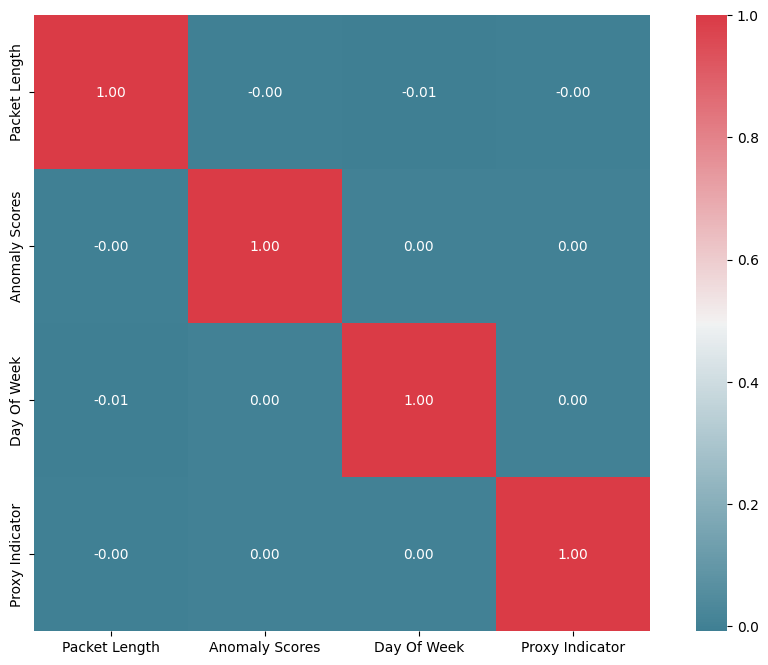

In [213]:
# Matriz de correlación
f, ax = plt.subplots(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, mask=np.zeros_like(corr), annot=True, fmt=".2f",
        cmap=sns.diverging_palette(220, 10, as_cmap=True),
        square=True, ax=ax)

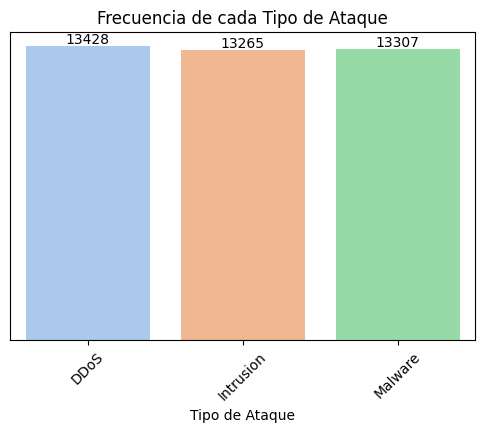

In [214]:
# Frecuencia de cada ataque
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Attack Type', hue='Attack Type', palette='pastel')

# Agregar etiquetas a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

# Eliminar numeración del eje vertical
ax.yaxis.set_ticks([])

plt.title('Frecuencia de cada Tipo de Ataque')
plt.xlabel('Tipo de Ataque')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

### **Hipótesis 3.1. Relación entre la Información de Red y Tipos de Ataques:**

Se espera que la información de red y sus derivados (Protocol, Packet Length, Packet Type, Traffic Type, Day Part, Day Of Week, Source IP Class, Destination IP Class, Source Port Category y Destination Port Category) tengan una correlación significativa con tipos específicos de ataques cibernéticos.

#### Análisis Univariado

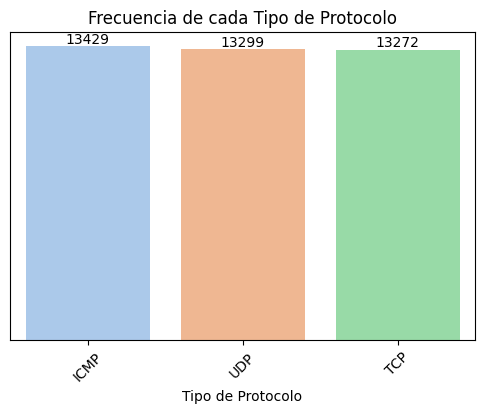

In [215]:
# Frecuencia de cada protocolo
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Protocol', hue='Protocol', palette='pastel')

# Agregar etiquetas a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

# Eliminar numeración del eje vertical
ax.yaxis.set_ticks([])

plt.title('Frecuencia de cada Tipo de Protocolo')
plt.xlabel('Tipo de Protocolo')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

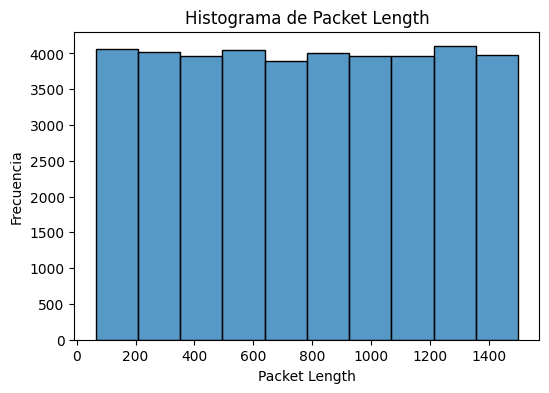

In [216]:
# Histograma de la variable 'Packet Length'
plt.figure(figsize=(6, 4))
sns.histplot(df['Packet Length'], bins=10, kde=False)
plt.title('Histograma de Packet Length')
plt.xlabel('Packet Length')
plt.ylabel('Frecuencia')
plt.show()

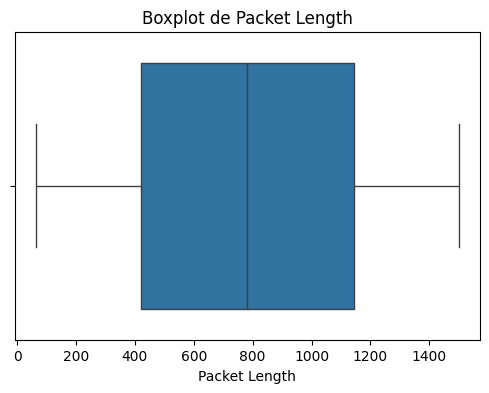

In [217]:
# Boxplot de la variable 'Packet Length'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Packet Length'])
plt.title('Boxplot de Packet Length')
plt.xlabel('Packet Length')
plt.show()

En el campo **Packet Length** se evidencia una distribución que aproxima al modelo rectángular y que sus datos no tienen outliers (Datos atípicos).

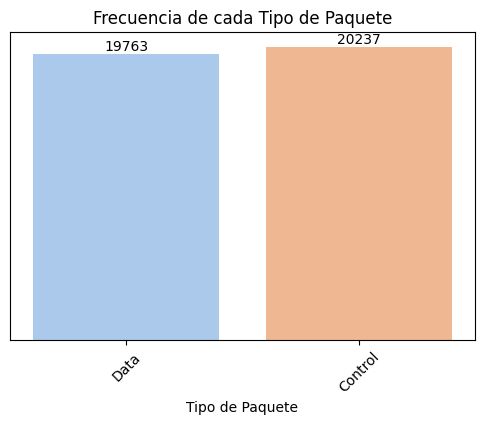

In [218]:
# Frecuencia de cada tipo de paquete
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Packet Type', hue='Packet Type', palette='pastel')

# Agregar etiquetas a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

# Eliminar numeración del eje vertical
ax.yaxis.set_ticks([])

plt.title('Frecuencia de cada Tipo de Paquete')
plt.xlabel('Tipo de Paquete')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

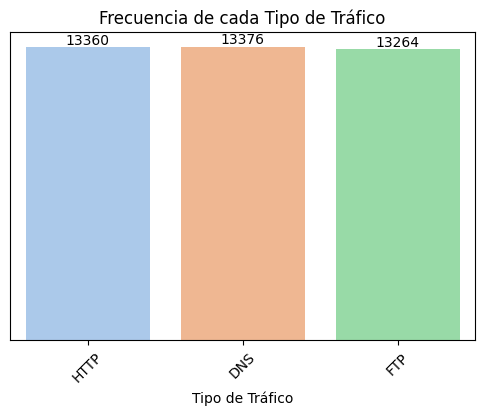

In [219]:
# Frecuencia de cada tipo de tráfico
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Traffic Type', hue='Traffic Type', palette='pastel')

# Agregar etiquetas a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

# Eliminar numeración del eje vertical
ax.yaxis.set_ticks([])

plt.title('Frecuencia de cada Tipo de Tráfico')
plt.xlabel('Tipo de Tráfico')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

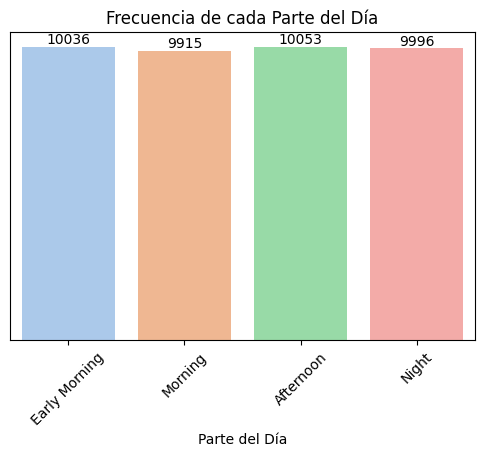

In [220]:
# Frecuencia de cada parte del día
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Day Part', hue='Day Part', palette='pastel')

# Agregar etiquetas a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

# Eliminar numeración del eje vertical
ax.yaxis.set_ticks([])

plt.title('Frecuencia de cada Parte del Día')
plt.xlabel('Parte del Día')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

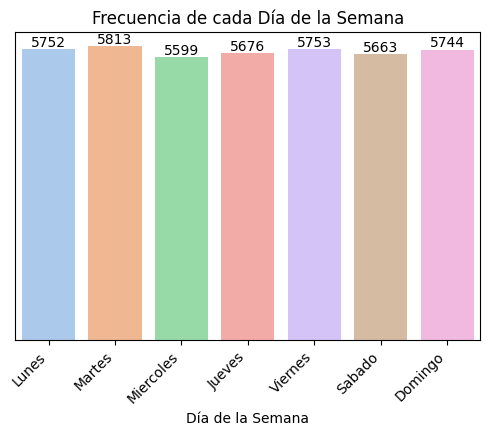

In [221]:
# Frecuencia de cada Día de la Semana
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Day Of Week', hue='Day Of Week', palette='pastel')

# Cambiar las etiquetas del eje X
new_labels = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']  # Asegúrate de que haya una etiqueta para cada categoría
ax.set_xticks(ax.get_xticks())  # Fijar las ubicaciones de las etiquetas
ax.set_xticklabels(new_labels, rotation=45, ha='right')

# Agregar etiquetas a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

# Eliminar numeración del eje vertical
ax.yaxis.set_ticks([])

# Eliminar la leyenda
ax.legend().set_visible(False)

plt.title('Frecuencia de cada Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('')
plt.show()

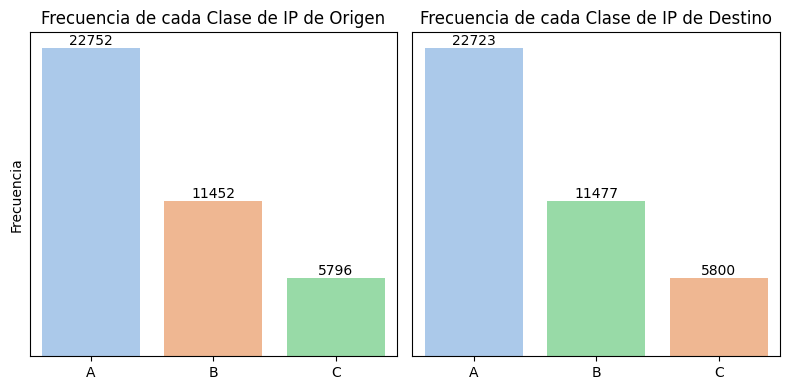

In [222]:
# Ordenar alfabéticamente los valores del eje X
order_source = sorted(df['Source IP Class'].unique())
order_destination = sorted(df['Destination IP Class'].unique())

# Configuración de la figura con dos subplots que comparten el eje Y
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

# Gráfico de barras para Source IP Class
sns.countplot(data=df, x='Source IP Class', hue='Source IP Class', palette='pastel', ax=axes[0], order = order_source, dodge=False, legend=False)
axes[0].set_title('Frecuencia de cada Clase de IP de Origen')
axes[0].set_xlabel('')  # Eliminamos el label del eje X superior ya que se comparte
axes[0].set_ylabel('Frecuencia')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge')
axes[0].yaxis.set_ticks([])

# Gráfico de barras para Destination IP Class
sns.countplot(data=df, x='Destination IP Class', hue='Destination IP Class', palette='pastel', ax=axes[1], order = order_destination, dodge=False, legend=False)
axes[1].set_title('Frecuencia de cada Clase de IP de Destino')
axes[1].set_xlabel('')
axes[1].set_ylabel('Frecuencia')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', label_type='edge')
axes[1].yaxis.set_ticks([])

plt.tight_layout()
plt.show()

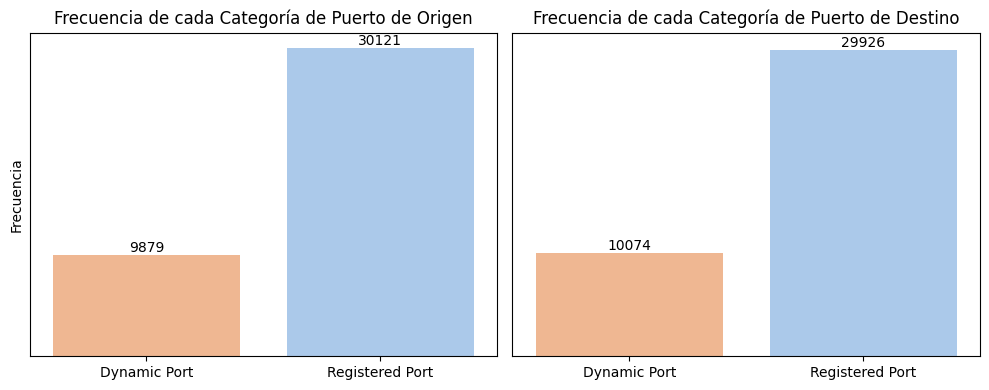

In [223]:
# Ordenar alfabéticamente los valores del eje X
order_source = sorted(df['Source Port Category'].unique())
order_destination = sorted(df['Destination Port Category'].unique())

# Configuración de la figura con dos subplots que comparten el eje Y
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Gráfico de barras para Source IP Class
sns.countplot(data=df, x='Source Port Category', hue='Source Port Category', palette='pastel', ax=axes[0], order = order_source, dodge=False, legend=False)
axes[0].set_title('Frecuencia de cada Categoría de Puerto de Origen')
axes[0].set_xlabel('')  # Eliminamos el label del eje X superior ya que se comparte
axes[0].set_ylabel('Frecuencia')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge')
axes[0].yaxis.set_ticks([])

# Gráfico de barras para Destination IP Class
sns.countplot(data=df, x='Destination Port Category', hue='Destination Port Category', palette='pastel', ax=axes[1], order = order_destination, dodge=False, legend=False)
axes[1].set_title('Frecuencia de cada Categoría de Puerto de Destino')
axes[1].set_xlabel('')
axes[1].set_ylabel('Frecuencia')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', label_type='edge')
axes[1].yaxis.set_ticks([])

plt.tight_layout()
plt.show()

#### Análisis Bivariado

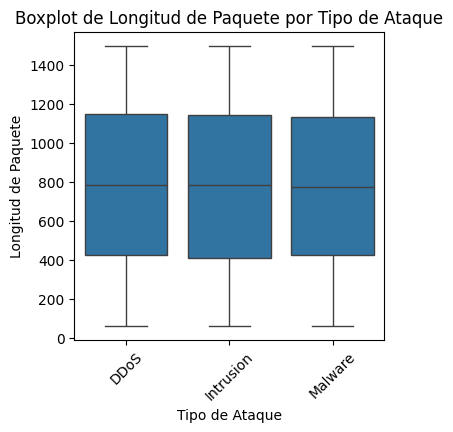

In [224]:
# Crea el Boxplot de Longitud de Paquete por Tipo de Ataque
plt.figure(figsize=(4, 4))
sns.boxplot(x='Attack Type', y='Packet Length', data=df)
plt.title('Boxplot de Longitud de Paquete por Tipo de Ataque')
plt.xlabel('Tipo de Ataque')
plt.ylabel('Longitud de Paquete')
plt.xticks(rotation=45)
plt.show()

In [225]:
# Crear tabla de contingencia entre 'Attack Type' y 'Protocol'
contingency_table = pd.crosstab(df['Attack Type'], df['Protocol'])

# Realizar la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Crear un DataFrame con los resultados
chi2_results = pd.DataFrame({
    'Chi2': [chi2],
    'p-value': [p],
    'Degrees of Freedom': [dof]
})

# Mostrar los resultados
print("Tabla de Contingencia:")
print(contingency_table)
print("\nResultados de la Prueba Chi-cuadrado:")
print(chi2_results)

Tabla de Contingencia:
Protocol     ICMP   TCP   UDP
Attack Type                  
DDoS         4508  4438  4482
Intrusion    4460  4397  4408
Malware      4461  4437  4409

Resultados de la Prueba Chi-cuadrado:
       Chi2   p-value  Degrees of Freedom
0  0.321058  0.988415                   4


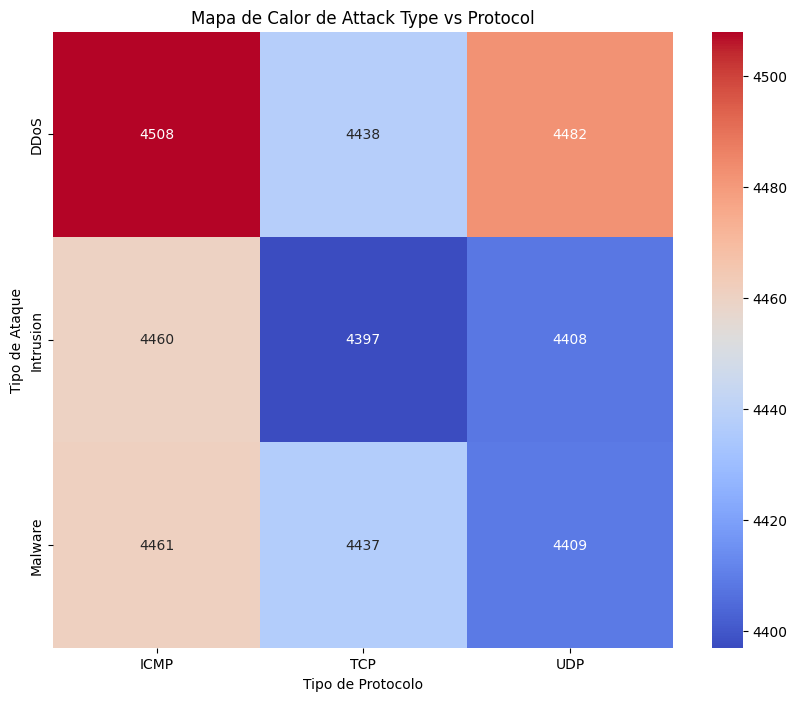

In [226]:
# Crear un gráfico de calor basado en la tabla de contingencia
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Mapa de Calor de Attack Type vs Protocol')
plt.xlabel('Tipo de Protocolo')
plt.ylabel('Tipo de Ataque')
plt.show()

**Interpretación del Resultado**

**Chi2:** El valor de chi-cuadrado es muy pequeño (0.321058), lo que indica que las frecuencias observadas están muy cerca de las frecuencias esperadas bajo la hipótesis nula de independencia, es decir, sugiere que no hay mucha diferencia entre las frecuencias observadas y las esperadas, lo que sugiere una asociación más débil entre las variables.

**p-value:** El valor p es 0.988415, que es mucho mayor que el umbral común de 0.05. Esto sugiere que no hay suficiente evidencia para rechazar la hipótesis nula de independencia. En otras palabras, no hay una asociación significativa entre Attack Type y Protocol.

**Degrees of Freedom:** Los grados de libertad (4) son coherentes con el número de categorías en las variables.

In [227]:
# Realizar ANOVA entre 'Attack Type' (variable categórica) y 'Packet Length' (variable numérica)
model = ols('Q("Packet Length") ~ C(Q("Attack Type"))', data=df).fit()   # Q: Se utiliza para manejar nombres de columnas que contienen caracteres especiales o espacios. C(Q(...)): Indica que una variable es categórica y maneja su nombre cuidadosamente.
anova_table = sm.stats.anova_lm(model, typ=2)

# Mostrar la tabla de ANOVA
display(anova_table)

,sum_sq,df,F,PR(>F)
"C(Q(""Attack Type""))",3.617882e+05,2.0,1.045073,0.351676
Residual,6.923176e+09,39997.0,NaN,NaN


Conclusión

- Hipótesis Nula: No hay diferencias significativas entre los grupos definidos por Attack Type.

- Resultado: Con un valor p de 0.351676, no hay suficiente evidencia para rechazar la hipótesis nula. Esto indica que Attack Type no tiene un efecto significativo sobre Anomaly Scores en este conjunto de datos.

- Implicación: La variabilidad en los Anomaly Scores no puede explicarse significativamente por las diferencias en Attack Type.

In [228]:
# Crear tabla de contingencia entre 'Attack Type' y 'Packet Type'
contingency_table = pd.crosstab(df['Attack Type'], df['Packet Type'])

# Realizar la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Crear un DataFrame con los resultados
chi2_results = pd.DataFrame({
    'Chi2': [chi2],
    'p-value': [p],
    'Degrees of Freedom': [dof]
})

# Mostrar los resultados
print("Tabla de Contingencia:")
display(contingency_table)
print("\nResultados de la Prueba Chi-cuadrado:")
display(chi2_results)

Tabla de Contingencia:


Packet Type,Control,Data
Attack Type,,
DDoS,6679,6749
Intrusion,6755,6510
Malware,6803,6504



Resultados de la Prueba Chi-cuadrado:


,Chi2,p-value,Degrees of Freedom
0,5.99226,0.04998,2


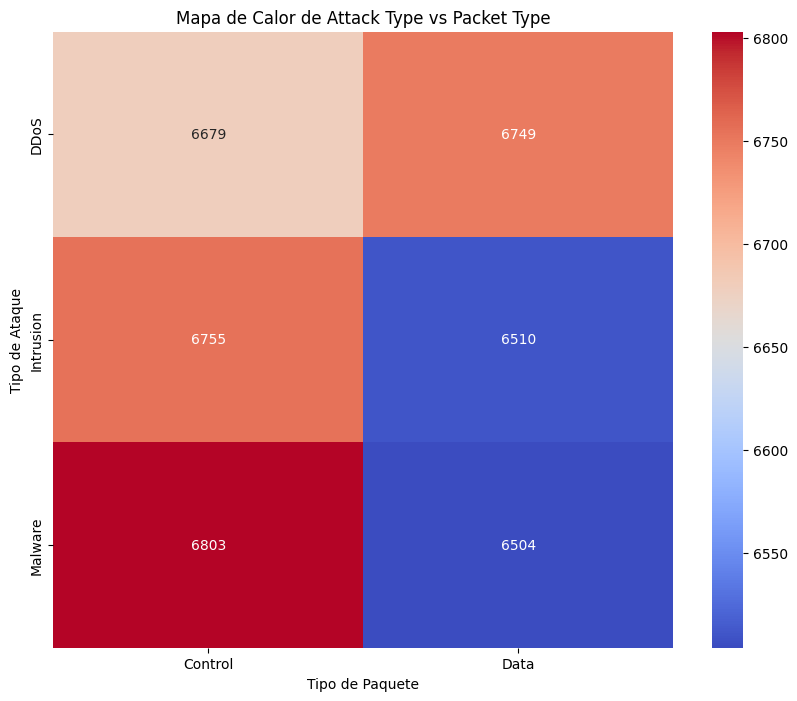

In [229]:
# Crear un gráfico de calor basado en la tabla de contingencia
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Mapa de Calor de Attack Type vs Packet Type')
plt.xlabel('Tipo de Paquete')
plt.ylabel('Tipo de Ataque')
plt.show()

Dado el valor del estadístico chi-cuadrado de 5.99226, un valor p de 0.04998 y 2 grados de libertad, podemos concluir lo siguiente:

- Rechazo de la Hipótesis Nula: Con un valor p de 0.04998, que es menor que 0.05, hay suficiente evidencia para rechazar la hipótesis nula de que las dos variables categóricas son independientes.

- Existencia de Asociación Significativa: Esto sugiere que existe una asociación significativa entre las dos variables categóricas analizadas. La relación entre las variables no es debida al azar, y hay una dependencia significativa entre ellas.

                                                                  🟠

In [230]:
# Crear tabla de contingencia entre 'Attack Type' y 'Traffic Type'
contingency_table = pd.crosstab(df['Attack Type'], df['Traffic Type'])

# Realizar la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Crear un DataFrame con los resultados
chi2_results = pd.DataFrame({
    'Chi2': [chi2],
    'p-value': [p],
    'Degrees of Freedom': [dof]
})

# Mostrar los resultados
print("Tabla de Contingencia:")
display(contingency_table)
print("\nResultados de la Prueba Chi-cuadrado:")
display(chi2_results)

Tabla de Contingencia:


Traffic Type,DNS,FTP,HTTP
Attack Type,,,
DDoS,4528,4389,4511
Intrusion,4426,4453,4386
Malware,4422,4422,4463



Resultados de la Prueba Chi-cuadrado:


,Chi2,p-value,Degrees of Freedom
0,2.79039,0.593493,4


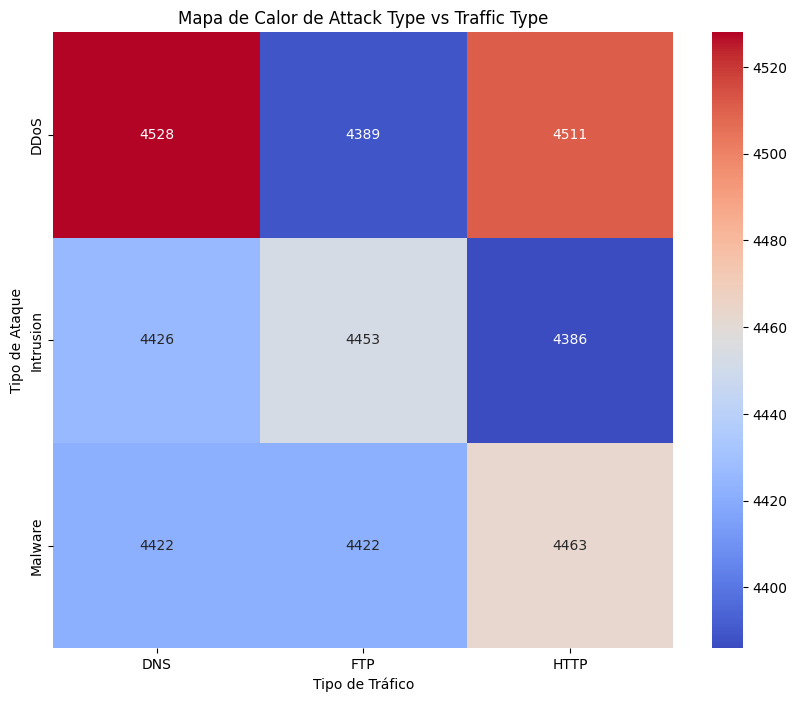

In [231]:
# Crear un gráfico de calor basado en la tabla de contingencia
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Mapa de Calor de Attack Type vs Traffic Type')
plt.xlabel('Tipo de Tráfico')
plt.ylabel('Tipo de Ataque')
plt.show()

Dado el valor del estadístico chi-cuadrado de 2.79039, un valor p de 0.593493 y 4 grados de libertad, podemos concluir lo siguiente:

- No Rechazo de la Hipótesis Nula: Con un valor p de 0.593493, que es significativamente mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de que las dos variables categóricas son independientes.

- No Existencia de Asociación Significativa: Esto sugiere que no existe una asociación significativa entre las dos variables categóricas analizadas. La relación entre las variables puede considerarse como debida al azar, y no hay una dependencia significativa entre ellas.

#### Análisis Multivariado

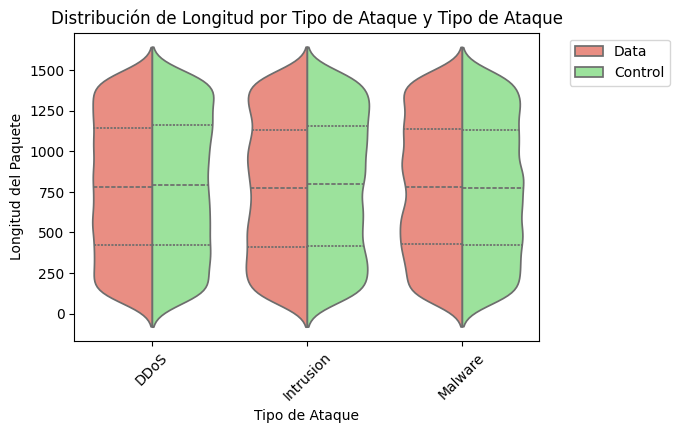

In [268]:
plt.figure(figsize=(6,4))

# Crear diccionario de colores (Mapeo)
hue_colors = {'Data': 'salmon', 'Control': 'lightgreen'}

# Crear gráfico de violín agrupado por las 3 categóricas
ax = sns.violinplot(x="Attack Type", y="Packet Length", hue="Packet Type", split=True, inner="quartile", palette=hue_colors, data=df)

# Cambiar el orden de las categorías
plt.xticks(rotation=45)

# Título y etiquetas
ax.set_title("Distribución de Longitud por Tipo de Ataque y Tipo de Ataque")
ax.set_xlabel("Tipo de Ataque")
ax.set_ylabel("Longitud del Paquete")

# Mover la leyenda fuera del área del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar gráfico
plt.show()

### **3.2. Impacto de los Datos de Seguridad y Detección:**

La presencia de Datos de Seguridad y Detección (Malware Indicators, Anomaly Scores, Alerts/Warnings) se correlacionará fuertemente con ciertos tipos de ataques, como malware y ransomware.

#### Análisis Univariado

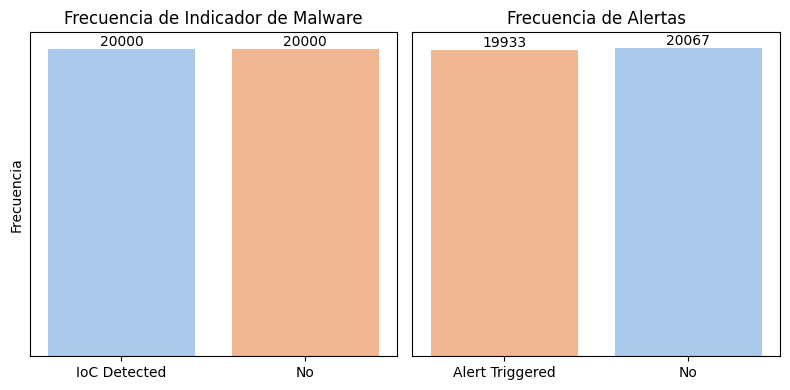

In [232]:
# Ordenar alfabéticamente los valores del eje X
order_malware = sorted(df['Malware Indicators'].unique())
order_alert = sorted(df['Alerts/Warnings'].unique())

# Configuración de la figura con dos subplots que comparten el eje Y
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

# Gráfico de barra para las Opciones de Malware Indicator
sns.countplot(data=df, x='Malware Indicators', hue='Malware Indicators', palette='pastel', ax=axes[0], order = order_malware, dodge=False, legend=False)
axes[0].set_title('Frecuencia de Indicador de Malware')
axes[0].set_xlabel('')  # Eliminamos el label del eje X superior ya que se comparte
axes[0].set_ylabel('Frecuencia')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge')
axes[0].yaxis.set_ticks([])

# Gráfico de barras para las Opciones de Alerts
sns.countplot(data=df, x='Alerts/Warnings', hue='Alerts/Warnings', palette='pastel', ax=axes[1], order = order_alert, dodge=False, legend=False)
axes[1].set_title('Frecuencia de Alertas')
axes[1].set_xlabel('')
axes[1].set_ylabel('Frecuencia')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', label_type='edge')
axes[1].yaxis.set_ticks([])

plt.tight_layout()
plt.show()

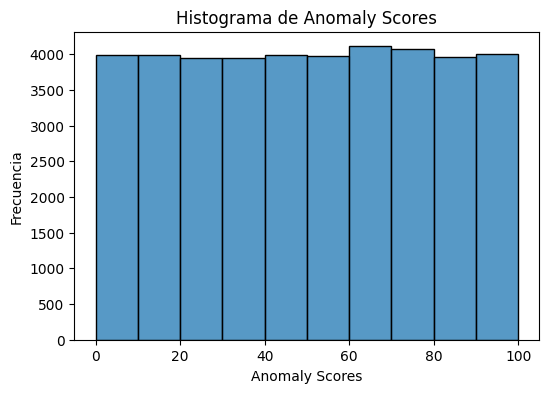

In [233]:
# Histograma de la variable 'Anomaly Scores'
plt.figure(figsize=(6, 4))
sns.histplot(df['Anomaly Scores'], bins=10, kde=False)
plt.title('Histograma de Anomaly Scores')
plt.xlabel('Anomaly Scores')
plt.ylabel('Frecuencia')
plt.show()

### Análisis Vibariado

In [234]:
# Crear tabla de contingencia entre 'Attack Type' y 'Malware Indicator'
contingency_table = pd.crosstab(df['Attack Type'], df['Malware Indicators'])

# Realizar la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Crear un DataFrame con los resultados
chi2_results = pd.DataFrame({
    'Chi2': [chi2],
    'p-value': [p],
    'Degrees of Freedom': [dof]
})

# Mostrar los resultados
print("Tabla de Contingencia:")
display(contingency_table)
print("\nResultados de la Prueba Chi-cuadrado:")
display(chi2_results)

Tabla de Contingencia:


Malware Indicators,IoC Detected,No
Attack Type,,
DDoS,6654,6774
Intrusion,6665,6600
Malware,6681,6626



Resultados de la Prueba Chi-cuadrado:


,Chi2,p-value,Degrees of Freedom
0,1.618217,0.445255,2


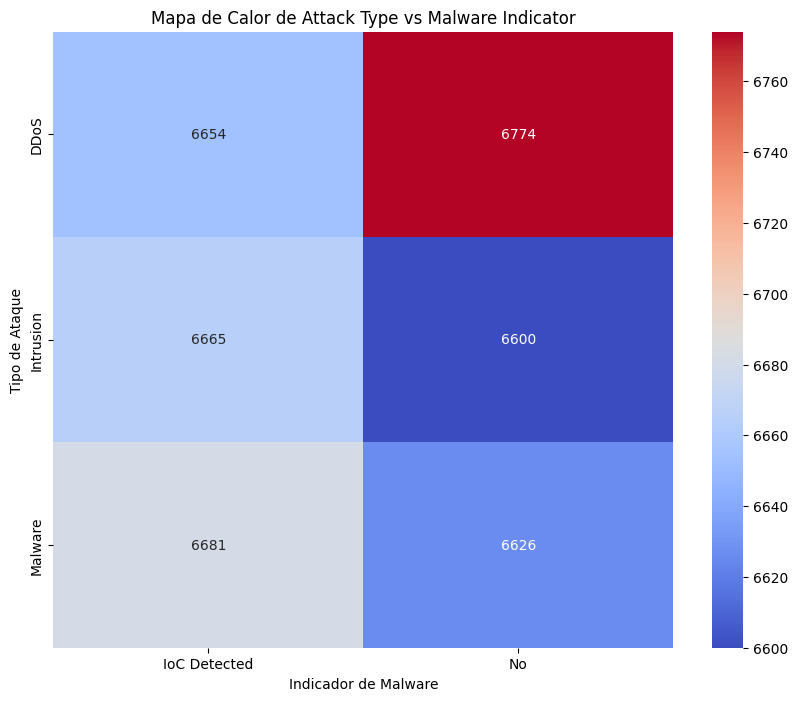

In [235]:
# Crear un gráfico de calor basado en la tabla de contingencia
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Mapa de Calor de Attack Type vs Malware Indicator')
plt.xlabel('Indicador de Malware')
plt.ylabel('Tipo de Ataque')
plt.show()

Conclusión:

Dado el valor del estadístico chi-cuadrado de 1.618217, un valor p de 0.445255 y 2 grados de libertad, podemos concluir lo siguiente:

- No Rechazo la Hipótesis Nula: Con un valor p de 0.445255, que es significativamente mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de que las dos variables categóricas son independientes.

- No Existencia de Asociación Significativa: Esto sugiere que no existe una asociación significativa entre las dos variables categóricas analizadas.

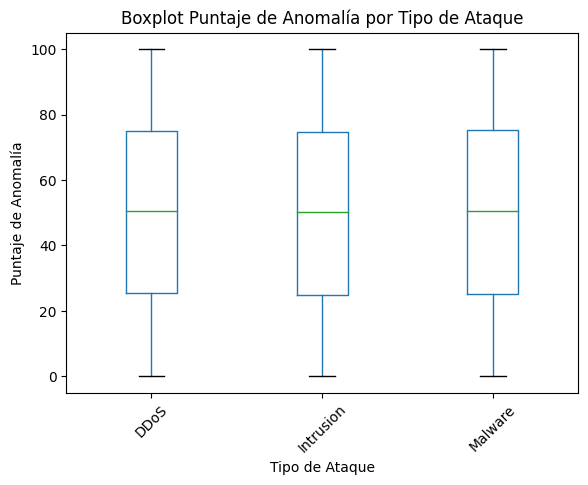

In [236]:
# Box Plot de 'Anomaly Socres' por Tipo de Ataque
df.boxplot(column='Anomaly Scores', by='Attack Type', grid=False)
plt.title('Boxplot Puntaje de Anomalía por Tipo de Ataque')
plt.suptitle('')
plt.xlabel('Tipo de Ataque')
plt.ylabel('Puntaje de Anomalía')
plt.xticks(rotation=45)
plt.show()

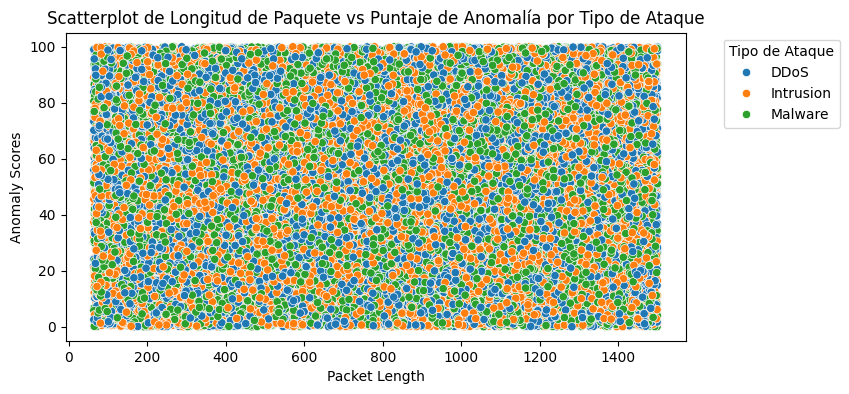

In [259]:
# Crear el scatterplot
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Packet Length', y='Anomaly Scores', hue='Attack Type', data=df,  palette='tab10')

# Configurar etiquetas y título
plt.xlabel('Packet Length')
plt.ylabel('Anomaly Scores')
plt.title('Scatterplot de Longitud de Paquete vs Puntaje de Anomalía por Tipo de Ataque')
plt.legend(title='Tipo de Ataque', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **3.3. Influencia del Usuario y su Dispositivo:**

La información de usuario y su dispostivo (Browser y Operating System) puede tener relación directa con el tipo de ataque.

#### Análisis Univariado

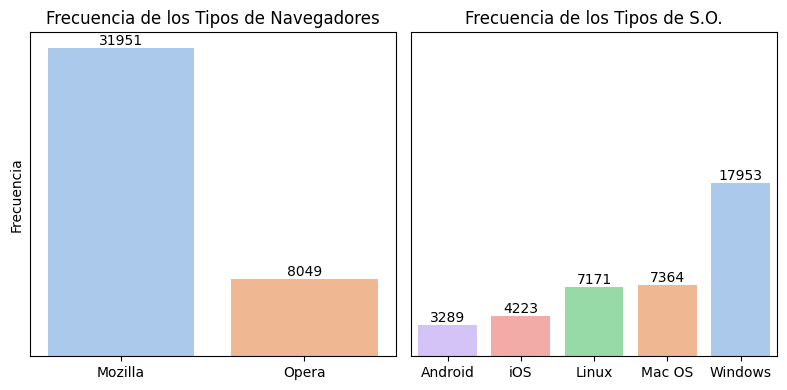

In [238]:
# Ordenar alfabéticamente los valores del eje X
order_browser = sorted(df['Browser'].unique())

#Orden Personalziado
order_OS = ['Android', 'iOS', 'Linux', 'Mac OS', 'Windows']

# Configuración de la figura con dos subplots que comparten el eje Y
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

# Gráfico de barra para las Opciones de los Navegadores
sns.countplot(data=df, x='Browser', hue='Browser', palette='pastel', ax=axes[0], order = order_browser, dodge=False, legend=False)
axes[0].set_title('Frecuencia de los Tipos de Navegadores')
axes[0].set_xlabel('')  # Eliminamos el label del eje X superior ya que se comparte
axes[0].set_ylabel('Frecuencia')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge')
axes[0].yaxis.set_ticks([])

# Gráfico de barras para las Opciones de SIstemas Operativos
sns.countplot(data=df, x='Operating System', hue='Operating System', palette='pastel', ax=axes[1], order = order_OS, dodge=False, legend=False)
axes[1].set_title('Frecuencia de los Tipos de S.O.')
axes[1].set_xlabel('')
axes[1].set_ylabel('Frecuencia')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', label_type='edge')
axes[1].yaxis.set_ticks([])

plt.tight_layout()
plt.show()

#### Análisis Bivariado

In [239]:
# Crear tabla de contingencia entre 'Attack Type' y 'Browser'
contingency_table = pd.crosstab(df['Attack Type'], df['Browser'])

# Realizar la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Crear un DataFrame con los resultados
chi2_results = pd.DataFrame({
    'Chi2': [chi2],
    'p-value': [p],
    'Degrees of Freedom': [dof]
})

# Mostrar los resultados
print("Tabla de Contingencia:")
display(contingency_table)
print("\nResultados de la Prueba Chi-cuadrado:")
display(chi2_results)

Tabla de Contingencia:


Browser,Mozilla,Opera
Attack Type,,
DDoS,10658,2770
Intrusion,10592,2673
Malware,10701,2606



Resultados de la Prueba Chi-cuadrado:


,Chi2,p-value,Degrees of Freedom
0,4.549503,0.102822,2


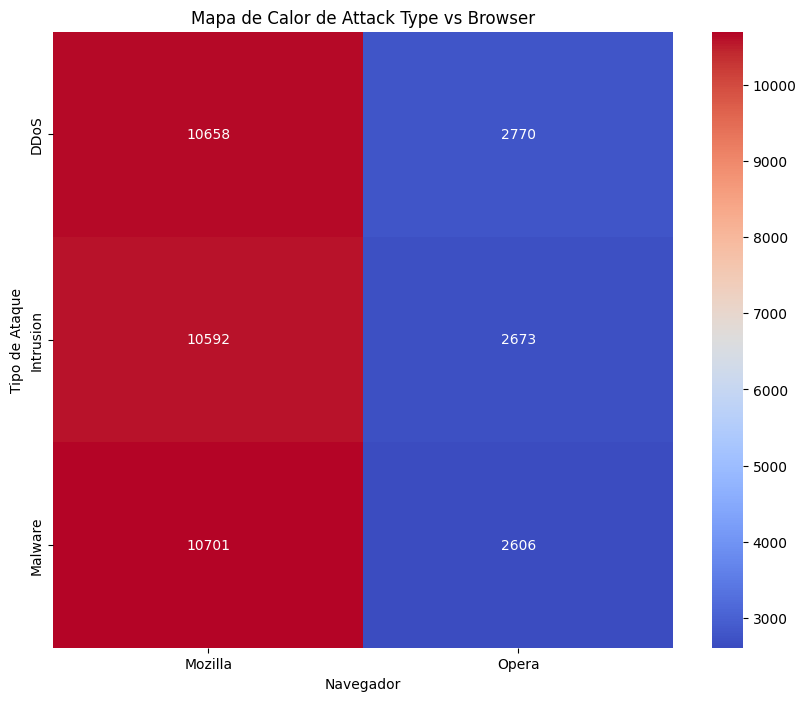

In [240]:
# Crear un gráfico de calor basado en la tabla de contingencia
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Mapa de Calor de Attack Type vs Browser')
plt.xlabel('Navegador')
plt.ylabel('Tipo de Ataque')
plt.show()

Conclusión:

Dado el valor del estadístico chi-cuadrado de 4.549503, un valor p de 0.102822 y 2 grados de libertad, podemos concluir lo siguiente:

- No Rechazo de la Hipótesis Nula: Con un valor p de 0.102822, que es mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de que las dos variables categóricas son independientes.

- No Existencia de Asociación Significativa: Esto sugiere que no existe una asociación significativa entre las dos variables categóricas analizadas.

In [241]:
# Crear tabla de contingencia entre 'Attack Type' y 'Operating System'
contingency_table = pd.crosstab(df['Attack Type'], df['Operating System'])

# Realizar la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Crear un DataFrame con los resultados
chi2_results = pd.DataFrame({
    'Chi2': [chi2],
    'p-value': [p],
    'Degrees of Freedom': [dof]
})

# Mostrar los resultados
print("Tabla de Contingencia:")
display(contingency_table)
print("\nResultados de la Prueba Chi-cuadrado:")
display(chi2_results)

Tabla de Contingencia:


Operating System,Android,Linux,Mac OS,Windows,iOS
Attack Type,,,,,
DDoS,1112,2464,2428,6014,1410
Intrusion,1086,2371,2441,5906,1461
Malware,1091,2336,2495,6033,1352



Resultados de la Prueba Chi-cuadrado:


,Chi2,p-value,Degrees of Freedom
0,9.765668,0.28186,8


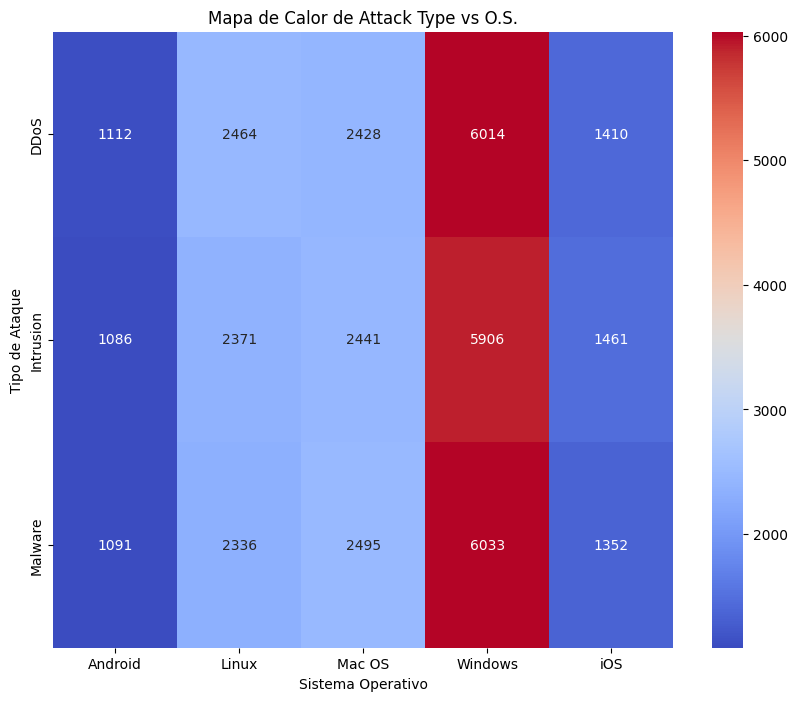

In [242]:
# Crear un gráfico de calor basado en la tabla de contingencia
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Mapa de Calor de Attack Type vs O.S.')
plt.xlabel('Sistema Operativo')
plt.ylabel('Tipo de Ataque')
plt.show()

Conclusión:

Dado el valor del estadístico chi-cuadrado de 9.765668, un valor p de 0.28186 y 8 grados de libertad, podemos concluir lo siguiente:

- No Rechazo de la Hipótesis Nula: Con un valor p de 0.28186, que es mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de que las dos variables categóricas son independientes.

- No Existencia de Asociación Significativa: Esto sugiere que no existe una asociación significativa entre las dos variables categóricas analizadas.

### **3.4. Correlación entre la Información de Red y Localización,  y los tipos de Ataques:**

Se espera que la información de la red y la localización (Network Segment y State) más con unos tipos de ataque que con otros.

#### Análisis Univariado

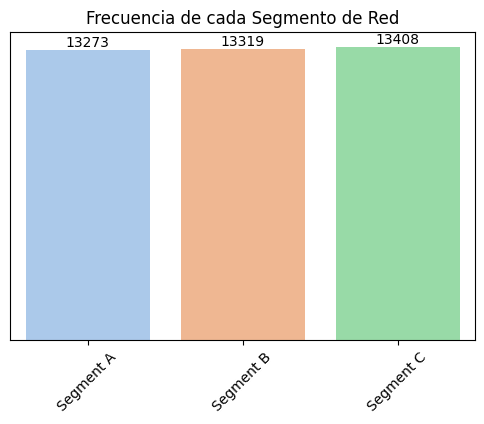

In [243]:
# Frecuencia de cada tipo de paquete
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Network Segment', hue='Network Segment', palette='pastel')

# Agregar etiquetas a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

# Eliminar numeración del eje vertical
ax.yaxis.set_ticks([])

plt.title('Frecuencia de cada Segmento de Red')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

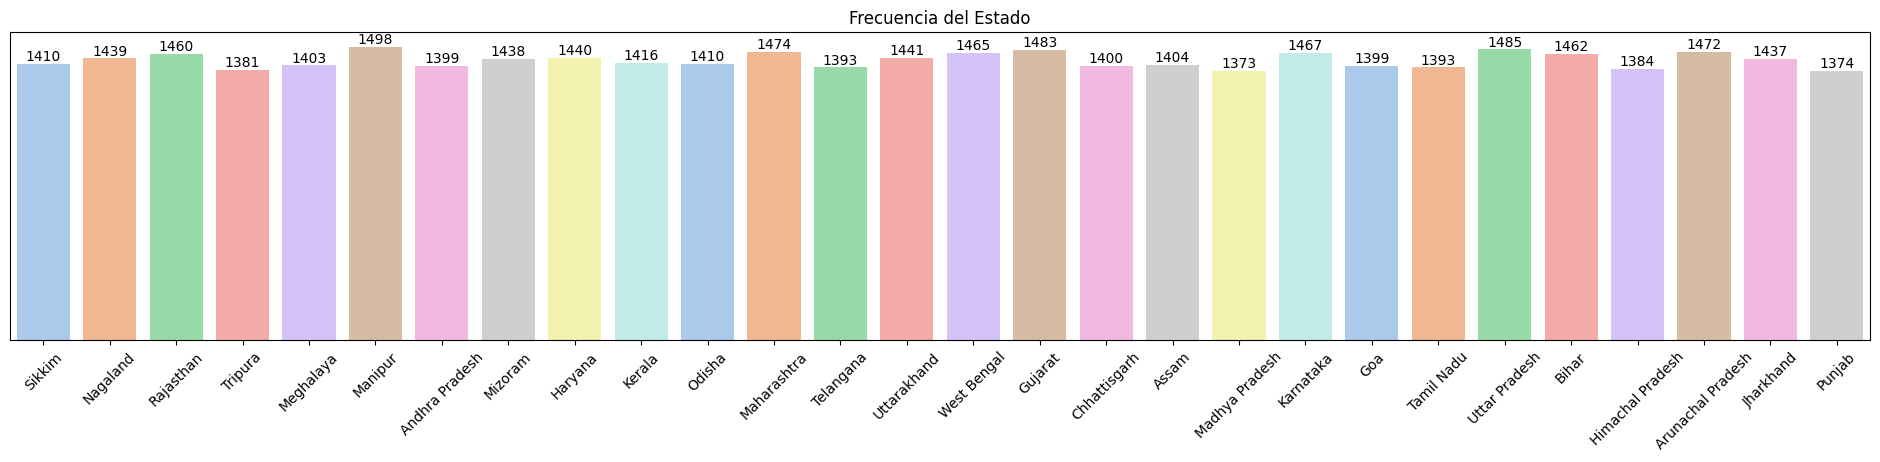

In [244]:
# Frecuencia de cada parte del día
plt.figure(figsize=(24, 4))
ax = sns.countplot(data=df, x='State', hue='State', palette='pastel')

# Agregar etiquetas a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

# Eliminar numeración del eje vertical
ax.yaxis.set_ticks([])

plt.title('Frecuencia del Estado')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

#### Análisis Bivariado

In [245]:
# Crear tabla de contingencia entre 'Attack Type' y 'Network Segment'
contingency_table = pd.crosstab(df['Attack Type'], df['Network Segment'])

# Realizar la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Crear un DataFrame con los resultados
chi2_results = pd.DataFrame({
    'Chi2': [chi2],
    'p-value': [p],
    'Degrees of Freedom': [dof]
})

# Mostrar los resultados
print("Tabla de Contingencia:")
display(contingency_table)
print("\nResultados de la Prueba Chi-cuadrado:")
display(chi2_results)

Tabla de Contingencia:


Network Segment,Segment A,Segment B,Segment C
Attack Type,,,
DDoS,4445,4466,4517
Intrusion,4349,4497,4419
Malware,4479,4356,4472



Resultados de la Prueba Chi-cuadrado:


,Chi2,p-value,Degrees of Freedom
0,4.545744,0.337158,4


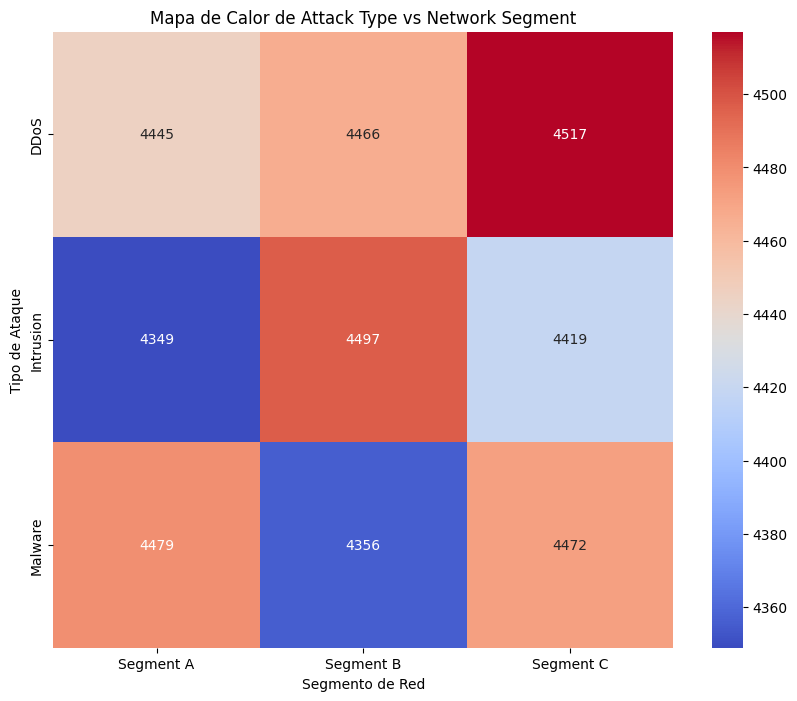

In [246]:
# Crear un gráfico de calor basado en la tabla de contingencia
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Mapa de Calor de Attack Type vs Network Segment')
plt.xlabel('Segmento de Red')
plt.ylabel('Tipo de Ataque')
plt.show()

Conclusión:

Dado el valor del estadístico chi-cuadrado de 4.545744, un valor p de 0.337158 y 4 grados de libertad, podemos concluir lo siguiente:

- No Rechazo de la Hipótesis Nula: Con un valor p de 0.337158, que es mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de que las dos variables categóricas son independientes.

- No Existencia de Asociación Significativa: Esto sugiere que no existe una asociación significativa entre las dos variables categóricas analizadas.

In [247]:
# Crear tabla de contingencia entre 'Attack Type' y 'State'
contingency_table = pd.crosstab(df['Attack Type'], df['State'])

# Realizar la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Crear un DataFrame con los resultados
chi2_results = pd.DataFrame({
    'Chi2': [chi2],
    'p-value': [p],
    'Degrees of Freedom': [dof]
})

# Mostrar los resultados
print("Tabla de Contingencia:")
display(contingency_table)
print("\nResultados de la Prueba Chi-cuadrado:")
display(chi2_results)

Tabla de Contingencia:


State,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jharkhand,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Attack Type,,,,,,,,,,,,,,,,,,,,,
DDoS,479,502,467,497,459,485,480,486,493,436,...,491,431,497,459,448,462,469,490,480,490
Intrusion,439,499,449,472,460,468,495,463,446,526,...,458,458,486,453,477,476,437,497,520,477
Malware,481,471,488,493,481,446,508,491,445,475,...,461,485,477,498,468,455,475,498,441,498



Resultados de la Prueba Chi-cuadrado:


,Chi2,p-value,Degrees of Freedom
0,48.327194,0.691977,54


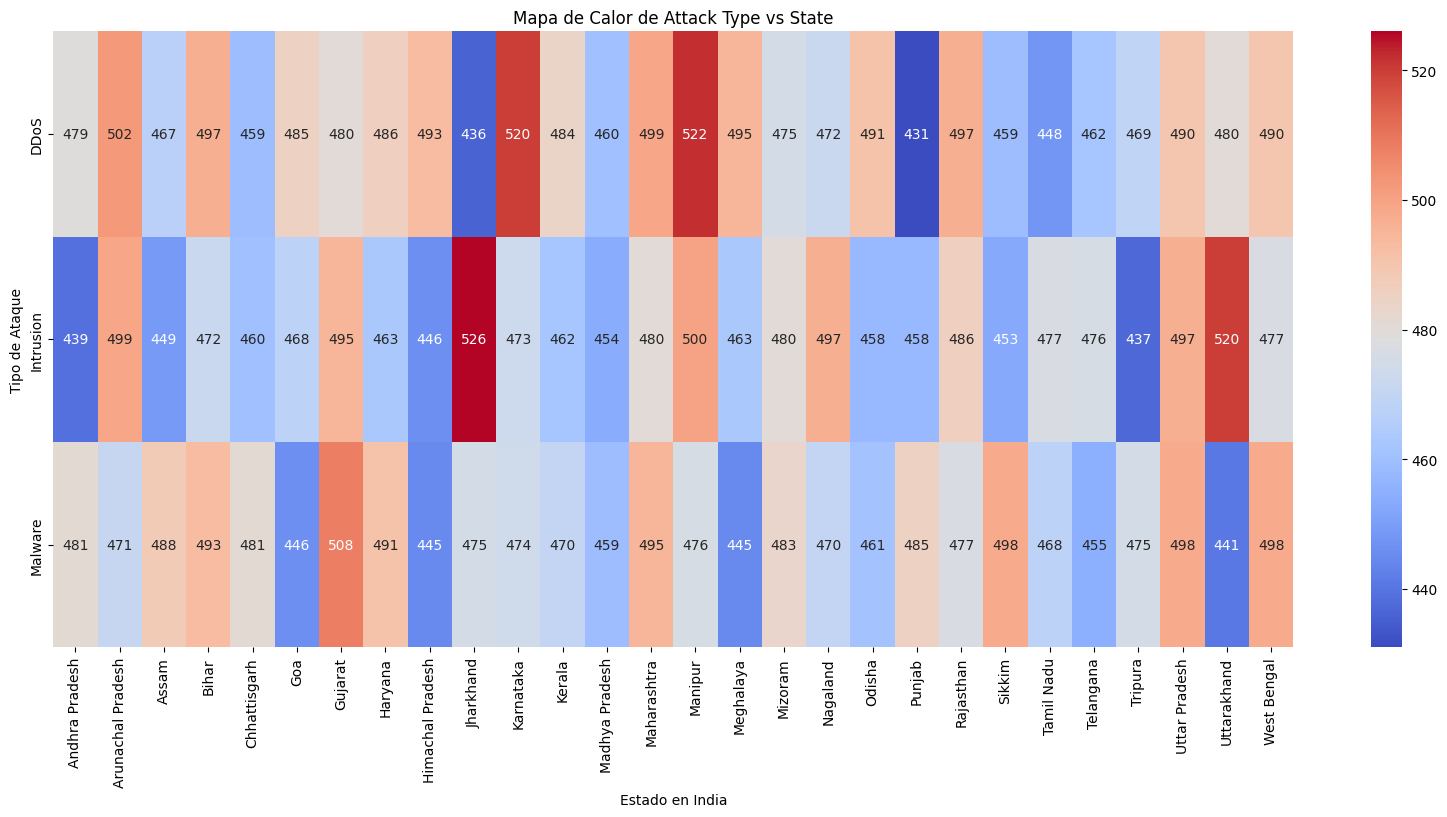

In [248]:
# Crear un gráfico de calor basado en la tabla de contingencia
plt.figure(figsize=(20, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Mapa de Calor de Attack Type vs State')
plt.xlabel('Estado en India')
plt.ylabel('Tipo de Ataque')
plt.show()

Conclusión:

Dado el valor del estadístico chi-cuadrado de 48.327194, un valor p de 0.691977 y 54 grados de libertad, podemos concluir lo siguiente:

- No Rechazo de la Hipótesis Nula: Con un valor p de 0.691977, que es mucho mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de que las dos variables categóricas son independientes.

- No Existencia de Asociación Significativa: Esto sugiere que no existe una asociación significativa entre las dos variables categóricas analizadas.

### **3.5. Variación según los indicadores y los tipos de ataque:**

Hay algunos indicadores (Firewall Logs, IDS/IPS Alerts, Log Source y Proxy Indicator) que van a estar presentes en unos tipos de ataque que en otros.

#### Análisis Univariado

In [249]:
df['Firewall Logs'].unique()

array(['Log Data', 'No'], dtype=object)

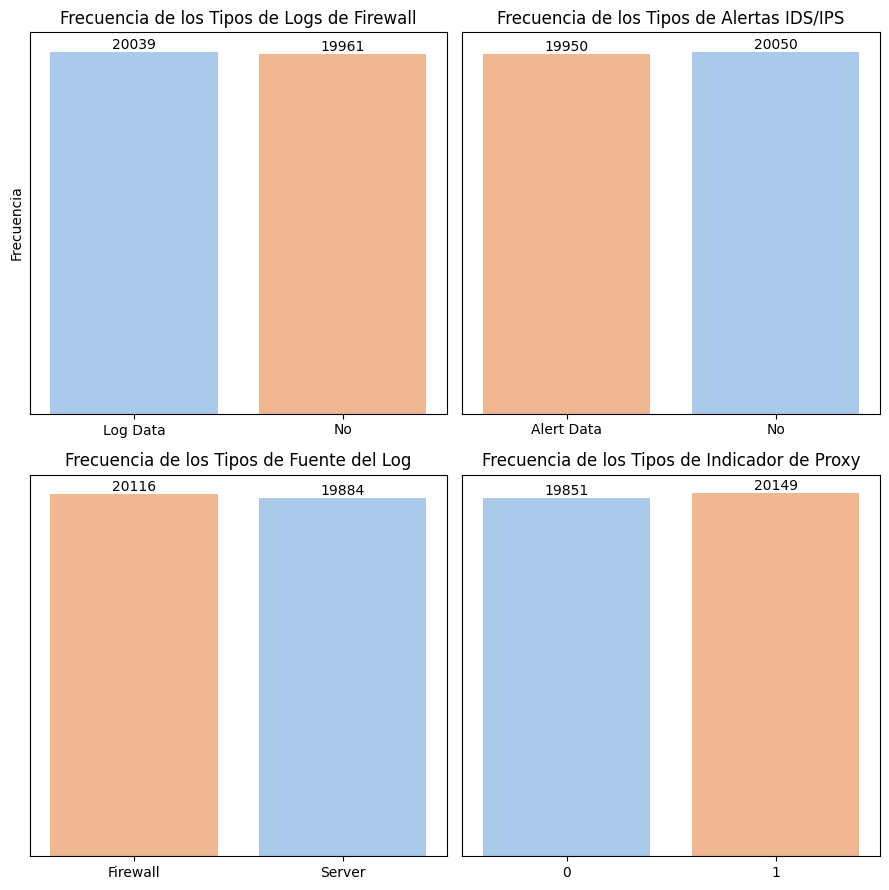

In [250]:
# Ordenar alfabéticamente los valores del eje X
order_firewall = sorted(df['Firewall Logs'].unique())
order_IPS = sorted(df['IDS/IPS Alerts'].unique())
order_log = sorted(df['Log Source'].unique())
order_proxy = sorted(df['Proxy Indicator'].unique())

# Configuración de la figura con dos subplots que comparten el eje Y
fig, axes = plt.subplots(2, 2, figsize=(9, 9), sharey=True)

# Gráfico de barra para las Opciones de Firewall Logs
sns.countplot(data=df, x='Firewall Logs', hue='Firewall Logs', palette='pastel', ax=axes[0, 0], order = order_firewall, dodge=False, legend=False)
axes[0, 0].set_title('Frecuencia de los Tipos de Logs de Firewall')
axes[0, 0].set_xlabel('')  # Eliminamos el label del eje X superior ya que se comparte
axes[0, 0].set_ylabel('Frecuencia')
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt='%d', label_type='edge')
axes[0, 0].yaxis.set_ticks([])

# Gráfico de barras para las Opciones de IDS/IPS Alerts
sns.countplot(data=df, x='IDS/IPS Alerts', hue='IDS/IPS Alerts', palette='pastel', ax=axes[0, 1], order = order_IPS, dodge=False, legend=False)
axes[0, 1].set_title('Frecuencia de los Tipos de Alertas IDS/IPS')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Frecuencia')
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%d', label_type='edge')
axes[0, 1].yaxis.set_ticks([])

# Gráfico de barra para las Opciones de Log Source
sns.countplot(data=df, x='Log Source', hue='Log Source', palette='pastel', ax=axes[1, 0], order = order_log, dodge=False, legend=False)
axes[1, 0].set_title('Frecuencia de los Tipos de Fuente del Log')
axes[1, 0].set_xlabel('')  # Eliminamos el label del eje X superior ya que se comparte
axes[1, 0].set_ylabel('Frecuencia')
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt='%d', label_type='edge')
axes[1, 0].yaxis.set_ticks([])

# Gráfico de barras para las Opciones de Proxy Indicator
sns.countplot(data=df, x='Proxy Indicator', hue='Proxy Indicator', palette='pastel', ax=axes[1, 1], order = order_proxy, dodge=False, legend=False)
axes[1, 1].set_title('Frecuencia de los Tipos de Indicador de Proxy')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Frecuencia')
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt='%d', label_type='edge')
axes[1, 1].yaxis.set_ticks([])

plt.tight_layout()
plt.show()

#### Análisis Bivariado

In [251]:
# Crear tabla de contingencia entre 'Attack Type' y 'Firewall Logs'
contingency_table = pd.crosstab(df['Attack Type'], df['Firewall Logs'])

# Realizar la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Crear un DataFrame con los resultados
chi2_results = pd.DataFrame({
    'Chi2': [chi2],
    'p-value': [p],
    'Degrees of Freedom': [dof]
})

# Mostrar los resultados
print("Tabla de Contingencia:")
display(contingency_table)
print("\nResultados de la Prueba Chi-cuadrado:")
display(chi2_results)

Tabla de Contingencia:


Firewall Logs,Log Data,No
Attack Type,,
DDoS,6712,6716
Intrusion,6623,6642
Malware,6704,6603



Resultados de la Prueba Chi-cuadrado:


,Chi2,p-value,Degrees of Freedom
0,0.642897,0.725098,2


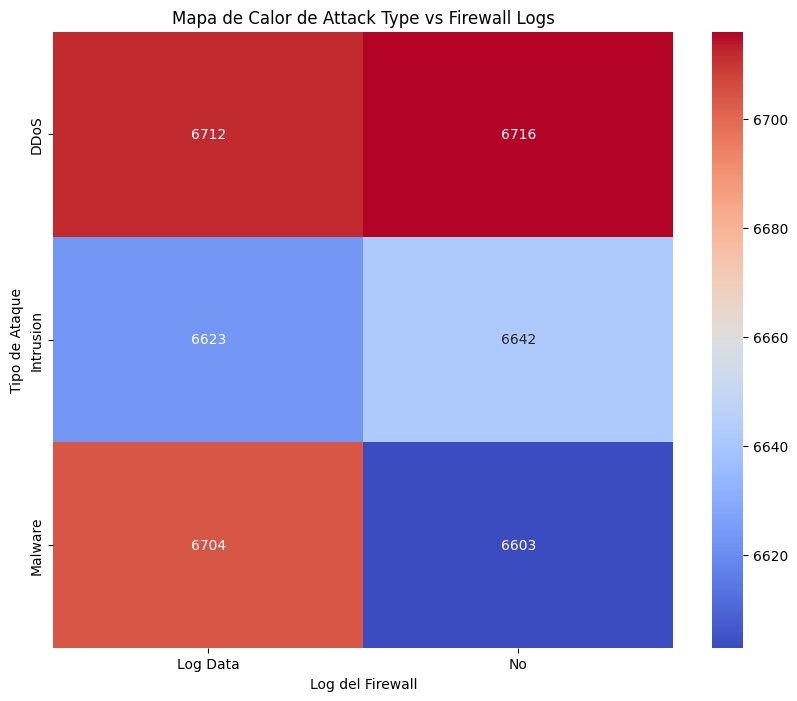

In [252]:
# Crear un gráfico de calor basado en la tabla de contingencia
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Mapa de Calor de Attack Type vs Firewall Logs')
plt.xlabel('Log del Firewall')
plt.ylabel('Tipo de Ataque')
plt.show()

Conclusión:

Dado el valor del estadístico chi-cuadrado de 0.642897, un valor p de 0.725098 y 2 grados de libertad, podemos concluir lo siguiente:

- No Rechazo de la Hipótesis Nula: Con un valor p de 0.725098, que es mucho mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de que las dos variables categóricas son independientes.

- No Existencia de Asociación Significativa: Esto sugiere que no existe una asociación significativa entre las dos variables categóricas analizadas.

In [253]:
# Crear tabla de contingencia entre 'Attack Type' y 'IDS/IPS Alerts'
contingency_table = pd.crosstab(df['Attack Type'], df['IDS/IPS Alerts'])

# Realizar la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Crear un DataFrame con los resultados
chi2_results = pd.DataFrame({
    'Chi2': [chi2],
    'p-value': [p],
    'Degrees of Freedom': [dof]
})

# Mostrar los resultados
print("Tabla de Contingencia:")
display(contingency_table)
print("\nResultados de la Prueba Chi-cuadrado:")
display(chi2_results)

Tabla de Contingencia:


IDS/IPS Alerts,Alert Data,No
Attack Type,,
DDoS,6697,6731
Intrusion,6587,6678
Malware,6666,6641



Resultados de la Prueba Chi-cuadrado:


,Chi2,p-value,Degrees of Freedom
0,0.507334,0.77595,2


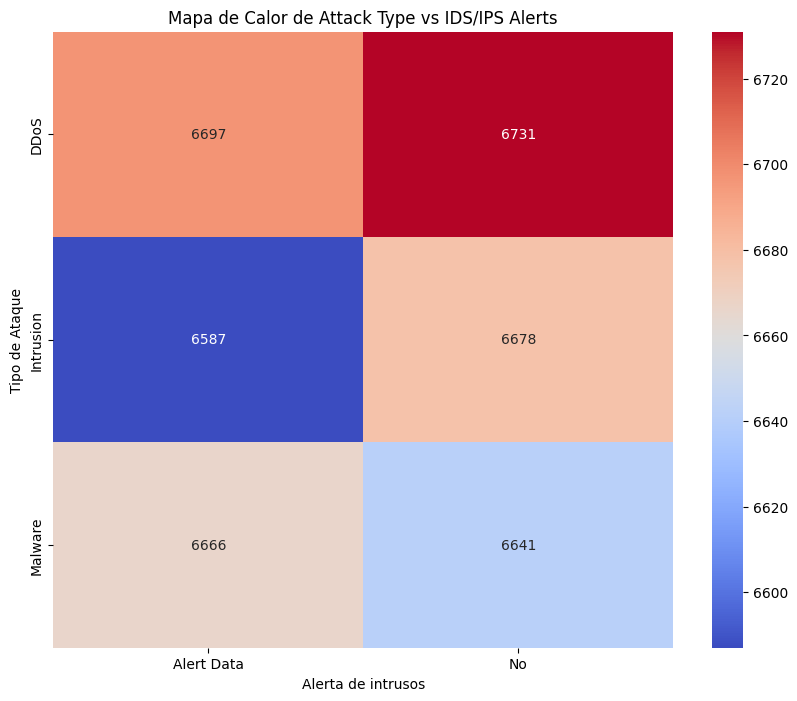

In [254]:
# Crear un gráfico de calor basado en la tabla de contingencia
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Mapa de Calor de Attack Type vs IDS/IPS Alerts')
plt.xlabel('Alerta de intrusos')
plt.ylabel('Tipo de Ataque')
plt.show()

Conclusión:

Dado el valor del estadístico chi-cuadrado de 0.507334, un valor p de 0.77595 y 2 grados de libertad, podemos concluir lo siguiente:

- No Rechazo de la Hipótesis Nula: Con un valor p de 0.77595, que es mucho mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de que las dos variables categóricas son independientes.

- No Existencia de Asociación Significativa: Esto sugiere que no existe una asociación significativa entre las dos variables categóricas analizadas.

In [255]:
# Crear tabla de contingencia entre 'Attack Type' y 'Proxy Indicator'
contingency_table = pd.crosstab(df['Attack Type'], df['Proxy Indicator'])

# Realizar la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Crear un DataFrame con los resultados
chi2_results = pd.DataFrame({
    'Chi2': [chi2],
    'p-value': [p],
    'Degrees of Freedom': [dof]
})

# Mostrar los resultados
print("Tabla de Contingencia:")
display(contingency_table)
print("\nResultados de la Prueba Chi-cuadrado:")
display(chi2_results)

Tabla de Contingencia:


Proxy Indicator,0,1
Attack Type,,
DDoS,6643,6785
Intrusion,6668,6597
Malware,6540,6767



Resultados de la Prueba Chi-cuadrado:


,Chi2,p-value,Degrees of Freedom
0,3.53408,0.170838,2


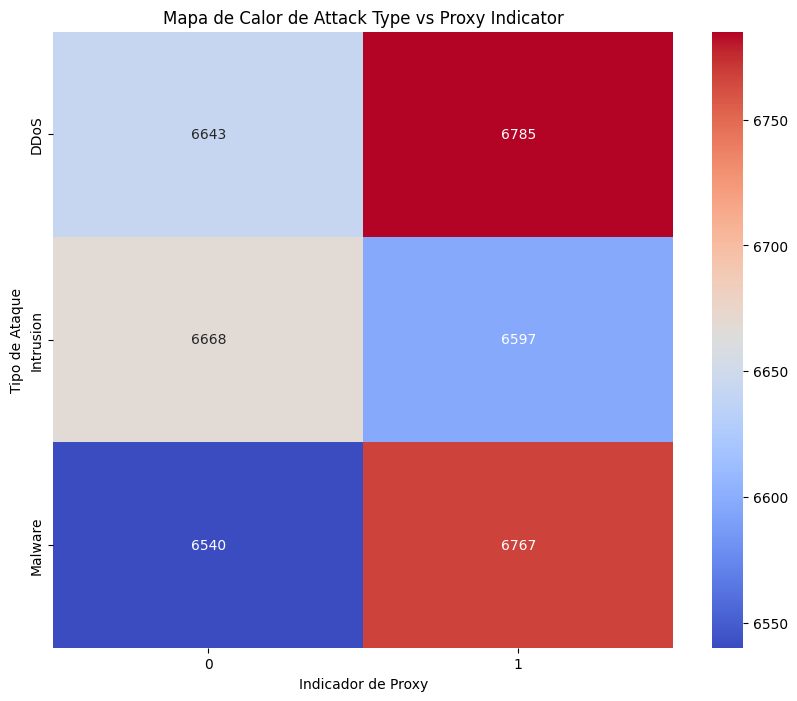

In [256]:
# Crear un gráfico de calor basado en la tabla de contingencia
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Mapa de Calor de Attack Type vs Proxy Indicator')
plt.xlabel('Indicador de Proxy')
plt.ylabel('Tipo de Ataque')
plt.show()

Conclusión:

Dado el valor del estadístico chi-cuadrado de 3.53408, un valor p de 0.170838 y 2 grados de libertad, podemos concluir lo siguiente:

- No Rechazo de la Hipótesis Nula: Con un valor p de 0.170838, que es mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de que las dos variables categóricas son independientes.

- No Existencia de Asociación Significativa: Esto sugiere que no existe una asociación significativa entre las dos variables categóricas analizadas.

In [257]:
#df.to_csv('cybersecurity_attacks_preprocessed.csv', index=False)

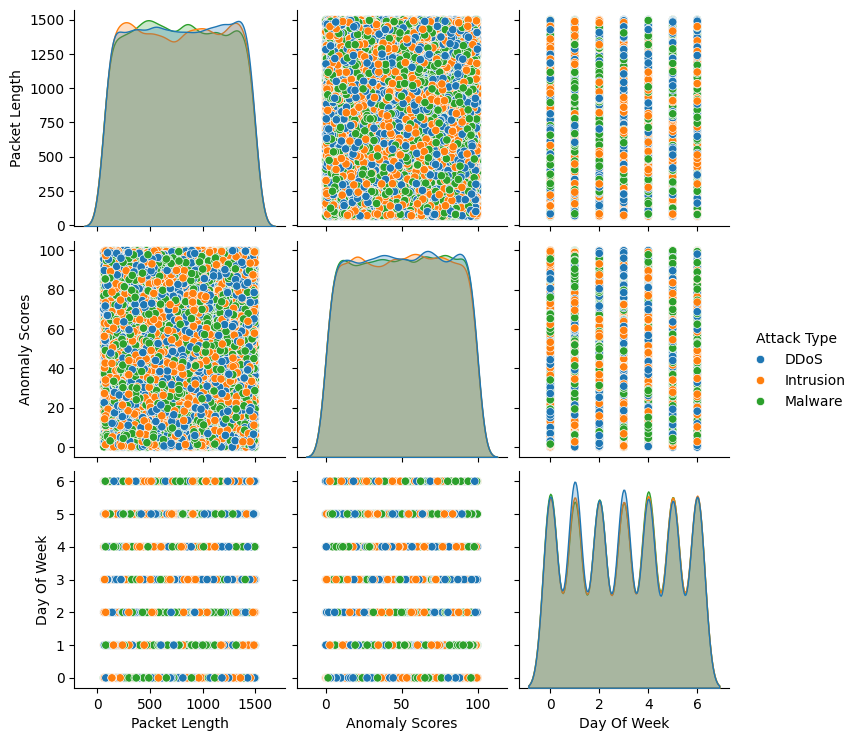

In [258]:
# Pair plor de variables numéricas, por tipo de ataque
sns.pairplot(df, hue='Attack Type', vars=['Packet Length', 'Anomaly Scores', 'Day Of Week'])
plt.show()

## Conclusiones

- ** 1. Relación entre la Información de Red y Tipos de Ataques:**

 - Los campos asociados a esta hipótesis tienen una distribución de frecuencia que se asemeja a una distribución rectangular, a diferencia de de las categorías creadas para las IP's y puertos, lo cual se debe a la dieferencia desproporcional de de los rangos.

 - No se evidencia una relación directa entre las features (Variables de Entrada) y lel Label (Variable de Salida), salvo entre la variable Paquete Type y Attack Type, deonde se P Value es menor de 0.05.

- ** 2. Impacto de los Datos de Seguridad y Detección:**

  - Los campos asociados a esta hipótesis tienen una distribución de frecuencia que se asemeja a una distribución rectangular

- ** 3. Influencia del Usuario y su Dispositivo:**

 - Los campos asociados a esta hipótesis (Browser y Sistema Operativo) presentan un desvalanceo evidente, donde los sistemas más usados son los de Escritorio y en menor medida, los S.O. de smartphones.

 - No se evidencia una relación directa entre las features (Variables de Entrada) y el Label (Variable de Salida).

- ** 4. Correlación entre la Información de Red y Localización,  y los tipos de Ataques:**

 - Los campos asociados a esta hipótesis presentan un balanceo de datos casi en su totalidad, es decir, la frecuencia de sus categorías son muy similares.

 - No se evidencia una relación directa entre las features (Variables de Entrada) y el Label (Variable de Salida).

- ** 5. Variación según los indicadores y los tipos de ataque:**

 - Los campos asociados a esta hipótesis presentan un balanceo de datos casi en su totalidad, es decir, la frecuencia de sus categorías son muy similares.

 - No se evidencia una relación directa entre las features (Variables de Entrada) y el Label (Variable de Salida).

- Otras Conclusiones:

 - La variable de Salida (Attack Type) tiene 3 categorías, las cuales tienen una frecuencia similar, por lo tanto, se encuentran balanceadeas.

 - Dado que la gran mayoría de variables de entrada son categóricas, no se realizó un gráfico de histogrma, sino que se realizó un gráfico de recuento.